# Text Mining 10K fillings to predict financial distress (EDF) (2012 - 2016)

### - Prediction Modeling (Random Forest Regression, Linear Regression, Logistic Regression)

- Add topic matrix, industry variable and categrorize industries
- Build prediction model

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline

In [3]:
#import topic mixture dataset 
topic_mixture_with_label = pd.read_csv('/Users/iriswang/Google Drive/Stevens/Fall 2018/BIA660/Project/code/output/topic_mixture_with_Label.csv',
                                       index_col=0)

In [4]:
topic_mixture_with_label.head()

,Downstream_Risks,Insurance_Risks,Company_Operation_Risks,New_Product_Introduction_Risks,International_Operation_Risks,Suppliers_Risks,Product_Design_Risks,Commodity_Price_Risks,Healthcare_Spending_Risks,Shareholder_Interest_Risks,Input_Prices_Risks,Regulation_Changes_risks,Infrastructure_Operation_Disruption Risks,Medical_Regulation_Risks,Investment_Risks
0,NaN,NaN,NaN,NaN,0.077445,0.100568,NaN,0.035261,NaN,NaN,NaN,0.560545,0.221024,NaN,NaN
1,NaN,NaN,NaN,NaN,0.077215,0.056698,NaN,0.063246,NaN,NaN,NaN,0.598037,0.198050,NaN,NaN
2,NaN,NaN,0.020661,NaN,0.075671,0.017670,NaN,0.045754,NaN,NaN,NaN,0.623851,0.209510,NaN,NaN
3,NaN,NaN,NaN,NaN,0.081197,0.022783,NaN,0.020453,NaN,NaN,NaN,0.675081,0.200066,NaN,NaN
4,NaN,NaN,0.184320,NaN,NaN,0.269203,NaN,0.062008,NaN,0.012008,NaN,0.451174,NaN,NaN,NaN


In [5]:
#fill all 'NaN' with 0
topic_mixture_with_label = topic_mixture_with_label.fillna(0)

In [6]:
topic_mixture_with_label.head()

,Downstream_Risks,Insurance_Risks,Company_Operation_Risks,New_Product_Introduction_Risks,International_Operation_Risks,Suppliers_Risks,Product_Design_Risks,Commodity_Price_Risks,Healthcare_Spending_Risks,Shareholder_Interest_Risks,Input_Prices_Risks,Regulation_Changes_risks,Infrastructure_Operation_Disruption Risks,Medical_Regulation_Risks,Investment_Risks
0,0.0,0.0,0.000000,0.0,0.077445,0.100568,0.0,0.035261,0.0,0.000000,0.0,0.560545,0.221024,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.077215,0.056698,0.0,0.063246,0.0,0.000000,0.0,0.598037,0.198050,0.0,0.0
2,0.0,0.0,0.020661,0.0,0.075671,0.017670,0.0,0.045754,0.0,0.000000,0.0,0.623851,0.209510,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.081197,0.022783,0.0,0.020453,0.0,0.000000,0.0,0.675081,0.200066,0.0,0.0
4,0.0,0.0,0.184320,0.0,0.000000,0.269203,0.0,0.062008,0.0,0.012008,0.0,0.451174,0.000000,0.0,0.0


In [7]:
topic_mixture_with_label.shape

(11581, 15)

### Add industry variable into topic mixture dataset

In [8]:
#import Risk factor dataset and add edf into topic mixture data
index_kmv_data_RiskFactor_industry = pd.read_csv('/Users/iriswang/Google Drive/Stevens/Fall 2018/BIA660/Project/code/output/index_kmv_data_industry.csv',
                                                index_col=0)

In [9]:
index_kmv_data_RiskFactor_industry.shape

(12103, 5)

In [10]:
index_kmv_data_RiskFactor_industry.head()

,gvkey,year,edf,actual_10k_path_raw,industry
0,1004,2012,0.468847,edgar/data/1750/0001047469-12-007300.txt,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
1,1004,2013,0.024986,edgar/data/1750/0001047469-13-007797.txt,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
2,1004,2014,0.000689,edgar/data/1750/0001047469-14-006243.txt,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
3,1004,2015,0.015321,edgar/data/1750/0001047469-15-006136.txt,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
4,1004,2016,0.026049,edgar/data/1750/0001047469-16-014299.txt,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...


In [11]:
index_kmv_data_RiskFactor_industry.isnull().sum(axis=0)

gvkey                  0
year                   0
edf                    0
actual_10k_path_raw    0
industry               0
dtype: int64

In [12]:
# load data - index file with risk_factor_text 
kmv_data_RiskFactor = pd.read_csv("../code/output/index_kmv_data_RiskFactor.csv", index_col=0)

In [13]:
kmv_data_RiskFactor.head()

,Unnamed: 0.1,gvkey,year,edf,actual_10k_path_raw,risk_factor_text
0,0,1004,2012,0.468847,edgar/data/1750/0001047469-12-007300.txt,"). The reduction in backlog from May 31, 2011 ..."
1,1,1004,2013,0.024986,edgar/data/1750/0001047469-13-007797.txt,** The following is a description of the prin...
2,2,1004,2014,0.000689,edgar/data/1750/0001047469-14-006243.txt,** The following is a description of the prin...
3,3,1004,2015,0.015321,edgar/data/1750/0001047469-15-006136.txt,** The following is a description of the prin...
4,4,1004,2016,0.026049,edgar/data/1750/0001047469-16-014299.txt,NaN


In [14]:
kmv_data_RiskFactor.shape

(12103, 6)

In [15]:
#merge kmv_data_RiskFactor (text) with index_kmv_data_RiskFactor_industry (industry) 
kmv_data_RiskFactor_industry = pd.merge(kmv_data_RiskFactor, 
                                        index_kmv_data_RiskFactor_industry, 
                                        on = ['gvkey', 'year'], how = 'left')

#print('items dimentions: {}'.format(kmv_data_RiskFactor.shape))
#print('new_items dimentions: {}'.format(kmv_data_RiskFactor_industry.shape))
#print('There are {} missing values in the new_items.'.format(kmv_data_RiskFactor_industry.isnull().sum()))

In [16]:
kmv_data_RiskFactor_industry = kmv_data_RiskFactor_industry[['gvkey', 'year', 'edf_x', 
                                                             'actual_10k_path_raw_x', 'risk_factor_text',
                                                             'industry']]

In [17]:
kmv_data_RiskFactor_industry.shape

(12103, 6)

In [18]:
kmv_data_RiskFactor_industry.head()

,gvkey,year,edf_x,actual_10k_path_raw_x,risk_factor_text,industry
0,1004,2012,0.468847,edgar/data/1750/0001047469-12-007300.txt,"). The reduction in backlog from May 31, 2011 ...",['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
1,1004,2013,0.024986,edgar/data/1750/0001047469-13-007797.txt,** The following is a description of the prin...,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
2,1004,2014,0.000689,edgar/data/1750/0001047469-14-006243.txt,** The following is a description of the prin...,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
3,1004,2015,0.015321,edgar/data/1750/0001047469-15-006136.txt,** The following is a description of the prin...,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
4,1004,2016,0.026049,edgar/data/1750/0001047469-16-014299.txt,NaN,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...


In [19]:
kmv_data_RiskFactor_industry.isnull().sum(axis=0)

gvkey                      0
year                       0
edf_x                      0
actual_10k_path_raw_x      0
risk_factor_text         522
industry                   0
dtype: int64

In [20]:
#drop rows with Null values
kmv_data_RiskFactor_industry_dropna = kmv_data_RiskFactor_industry.dropna(how='any')

In [21]:
kmv_data_RiskFactor_industry_dropna = kmv_data_RiskFactor_industry_dropna.reset_index(drop=True)

In [22]:
kmv_data_RiskFactor_industry_dropna.shape

(11581, 6)

In [23]:
kmv_data_RiskFactor_industry_dropna.head(10)

,gvkey,year,edf_x,actual_10k_path_raw_x,risk_factor_text,industry
0,1004,2012,4.688468e-01,edgar/data/1750/0001047469-12-007300.txt,"). The reduction in backlog from May 31, 2011 ...",['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
1,1004,2013,2.498562e-02,edgar/data/1750/0001047469-13-007797.txt,** The following is a description of the prin...,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
2,1004,2014,6.887845e-04,edgar/data/1750/0001047469-14-006243.txt,** The following is a description of the prin...,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
3,1004,2015,1.532112e-02,edgar/data/1750/0001047469-15-006136.txt,** The following is a description of the prin...,['STANDARD INDUSTRIAL CLASSIFICATION:\tAIRCRAF...
4,1050,2012,1.858681e-09,edgar/data/3197/0001193125-12-119293.txt,", which describes some, but not all, of the f...",['STANDARD INDUSTRIAL CLASSIFICATION:\tINDUSTR...
5,1050,2013,1.952039e-05,edgar/data/3197/0001193125-13-109153.txt,", which describes some, but not all, of the f...",['STANDARD INDUSTRIAL CLASSIFICATION:\tINDUSTR...
6,1050,2014,2.633908e-05,edgar/data/3197/0001193125-14-098407.txt, of this Annual Report on Form 10-K. Many of\...,['STANDARD INDUSTRIAL CLASSIFICATION:\tINDUSTR...
7,1050,2015,2.867500e-02,edgar/data/3197/0001193125-15-095828.txt, of this Annual Report on Form 10-K. Many of ...,['STANDARD INDUSTRIAL CLASSIFICATION:\tINDUSTR...
8,1050,2016,3.790925e-02,edgar/data/3197/0001564590-16-015157.txt,""" of this Annual Report on Form 10-K. These ri...",['STANDARD INDUSTRIAL CLASSIFICATION:\tINDUSTR...
9,1075,2012,3.407252e-31,edgar/data/764622/0001104659-12-012301.txt,** In addition to the factors affecting specif...,['STANDARD INDUSTRIAL CLASSIFICATION:\tELECTRI...


In [24]:
kmv_data_RiskFactor_industry_dropna['industry'][2]

"['STANDARD INDUSTRIAL CLASSIFICATION:\\tAIRCRAFT & PARTS [3720]', 'IRS NUMBER:\\t\\t\\t\\t362334820']"

In [25]:
#clean industry name
kmv_data_RiskFactor_industry_dropna['industry'] = kmv_data_RiskFactor_industry_dropna['industry'].map(
                                   lambda x: str(x).replace('STANDARD INDUSTRIAL CLASSIFICATION:', ''))

In [26]:
#remove everything after irs number
kmv_data_RiskFactor_industry_dropna['industry'] = kmv_data_RiskFactor_industry_dropna['industry'].map(
                                                   lambda x: str(x).split('IRS NUMBER:')[0])

In [27]:
#remove messy strings
kmv_data_RiskFactor_industry_dropna['industry'] = kmv_data_RiskFactor_industry_dropna['industry'].map(
                                                   lambda x: str(x).replace('\\t', ''))

In [28]:
#remove messy strings
kmv_data_RiskFactor_industry_dropna['industry'] = kmv_data_RiskFactor_industry_dropna['industry'].map(
                                                   lambda x: str(x).replace("', '", ""))

In [29]:
#remove messy strings
kmv_data_RiskFactor_industry_dropna['industry'] = kmv_data_RiskFactor_industry_dropna['industry'].map(
                                                   lambda x: str(x).replace("[''", ""))

In [30]:
#remove messy strings
kmv_data_RiskFactor_industry_dropna['industry'] = kmv_data_RiskFactor_industry_dropna['industry'].map(
                                                   lambda x: str(x).replace("[", ""))

In [31]:
#remove messy strings
kmv_data_RiskFactor_industry_dropna['industry'] = kmv_data_RiskFactor_industry_dropna['industry'].map(
                                                   lambda x: str(x).replace("]", ""))

In [32]:
#remove messy strings
kmv_data_RiskFactor_industry_dropna['industry'] = kmv_data_RiskFactor_industry_dropna['industry'].map(
                                                   lambda x: str(x).replace("'", ""))

In [33]:
kmv_data_RiskFactor_industry_dropna.head()

,gvkey,year,edf_x,actual_10k_path_raw_x,risk_factor_text,industry
0,1004,2012,4.688468e-01,edgar/data/1750/0001047469-12-007300.txt,"). The reduction in backlog from May 31, 2011 ...",AIRCRAFT & PARTS 3720
1,1004,2013,2.498562e-02,edgar/data/1750/0001047469-13-007797.txt,** The following is a description of the prin...,AIRCRAFT & PARTS 3720
2,1004,2014,6.887845e-04,edgar/data/1750/0001047469-14-006243.txt,** The following is a description of the prin...,AIRCRAFT & PARTS 3720
3,1004,2015,1.532112e-02,edgar/data/1750/0001047469-15-006136.txt,** The following is a description of the prin...,AIRCRAFT & PARTS 3720
4,1050,2012,1.858681e-09,edgar/data/3197/0001193125-12-119293.txt,", which describes some, but not all, of the f...",INDUSTRIAL & COMMERCIAL FANS & BLOWERS & AIR P...


In [34]:
kmv_data_RiskFactor_industry_dropna['industry'][822]

'RETAIL-DEPARTMENT STORES 5311'

In [35]:
industry = pd.DataFrame(kmv_data_RiskFactor_industry_dropna['industry'])
industry.head()

,industry
0,AIRCRAFT & PARTS 3720
1,AIRCRAFT & PARTS 3720
2,AIRCRAFT & PARTS 3720
3,AIRCRAFT & PARTS 3720
4,INDUSTRIAL & COMMERCIAL FANS & BLOWERS & AIR P...


In [36]:
industry_2 = pd.DataFrame(industry['industry'].str.split('(\D+)(\d+)', expand=True))
industry_2 = industry_2.loc[:,[1,2]]
industry_2.rename(columns={1:'industry_name', 2:'industry_code'}, inplace=True)

In [37]:
industry_2.head()

,industry_name,industry_code
0,AIRCRAFT & PARTS,3720
1,AIRCRAFT & PARTS,3720
2,AIRCRAFT & PARTS,3720
3,AIRCRAFT & PARTS,3720
4,INDUSTRIAL & COMMERCIAL FANS & BLOWERS & AIR P...,3564


In [38]:
#merge dataset to get finalized data with industry name and industry code
finalized_kmv_data_RiskFactor_industry = pd.concat([kmv_data_RiskFactor_industry_dropna, industry_2], axis=1)

In [39]:
finalized_kmv_data_RiskFactor_industry.sample(10)

,gvkey,year,edf_x,actual_10k_path_raw_x,risk_factor_text,industry,industry_name,industry_code
8231,140042,2013,1.395418e-01,edgar/data/926617/0001193125-13-087647.txt,", that could cause actual results to differ m...",IN VITRO & IN VIVO DIAGNOSTIC SUBSTANCES 2835,IN VITRO & IN VIVO DIAGNOSTIC SUBSTANCES,2835
6399,62123,2015,1.856720e-01,edgar/data/1609065/0001609065-15-000006.txt,Not required of a smaller reporting company.,STATE COMMERCIAL BANKS 6022,STATE COMMERCIAL BANKS,6022
4232,17715,2013,1.171416e-06,edgar/data/806279/0000897101-13-000450.txt,** Not applicable to smaller reporting compan...,"SAVINGS INSTITUTION, FEDERALLY CHARTERED 6035","SAVINGS INSTITUTION, FEDERALLY CHARTERED",6035
8894,158743,2016,5.637369e-08,edgar/data/1278027/0001047469-16-010671.txt,. ** Any investment in our company will be sub...,FOOD & KINDRED PRODUCTS 2000,FOOD & KINDRED PRODUCTS,2000
270,1982,2015,4.460857e-23,edgar/data/9346/0000009346-15-000006.txt,* The Company operates in the Property and Ca...,"FIRE, MARINE & CASUALTY INSURANCE 6331","FIRE, MARINE & CASUALTY INSURANCE",6331
6029,31629,2016,1.568672e-03,edgar/data/716634/0000716634-16-000067.txt,11 ﻿,SERVICES-MOTION PICTURE THEATERS 7830,SERVICES-MOTION PICTURE THEATERS,7830
4140,17132,2014,7.831554e-06,edgar/data/828944/0001193125-14-102580.txt,\n_** Investing in our securities involves ris...,NATIONAL COMMERCIAL BANKS 6021,NATIONAL COMMERCIAL BANKS,6021
3917,15240,2016,6.170203e-01,edgar/data/839470/0001052918-16-000869.txt,_ 18 __ _ITEM 1B. UNRESOLVED STAFF COMMENTS_ 2...,METAL MINING 1000,METAL MINING,1000
9083,161813,2016,9.543311e-01,edgar/data/1301787/0001301787-16-000147.txt,and elsewhere in this report and those descri...,"WHOLESALE-LUMBER, PLYWOOD, MILLWORK & WOOD PAN...","WHOLESALE-LUMBER, PLYWOOD, MILLWORK & WOOD PAN...",5031
3036,11376,2016,6.274127e-31,edgar/data/105770/0000105770-16-000060.txt,"; Part II, Item 7, Management's Discussion and...","FABRICATED RUBBER PRODUCTS, NEC 3060","FABRICATED RUBBER PRODUCTS, NEC",3060


In [40]:
def sic_to_industry(sic):
    industry = None
    if sic is not None:
        sic2 = int(sic[:2])
        if sic2 <= 9:
            industry = 'Agriculture'
        elif sic2 <= 14:
            industry = 'Mining'
        elif sic2 <= 17:
            industry = 'Construction'
        elif sic2 <= 39:
            industry = 'Manufacturing'
        elif sic2 <= 49:
            industry = 'Transportation, Communication, and Energy Services' 
        elif sic2 <= 51:
            industry = 'Wholesale'
        elif sic2 <= 59:
            industry = 'Retail'
        elif sic2 <= 67:
            industry = 'Finance, Insurance and Real Estate'
        elif sic2 <= 89:
            industry = 'Services'
        elif sic2 <= '99':
            industry = 'Public Administration'
    return industry

#Reference for industry: https://www.osha.gov/pls/imis/sic_manual.html

In [41]:
finalized_kmv_data_RiskFactor_industry['industry'] = finalized_kmv_data_RiskFactor_industry[
    'industry_code'].map(sic_to_industry)

In [42]:
finalized_kmv_data_RiskFactor_industry.head(10)

,gvkey,year,edf_x,actual_10k_path_raw_x,risk_factor_text,industry,industry_name,industry_code
0,1004,2012,4.688468e-01,edgar/data/1750/0001047469-12-007300.txt,"). The reduction in backlog from May 31, 2011 ...",Manufacturing,AIRCRAFT & PARTS,3720
1,1004,2013,2.498562e-02,edgar/data/1750/0001047469-13-007797.txt,** The following is a description of the prin...,Manufacturing,AIRCRAFT & PARTS,3720
2,1004,2014,6.887845e-04,edgar/data/1750/0001047469-14-006243.txt,** The following is a description of the prin...,Manufacturing,AIRCRAFT & PARTS,3720
3,1004,2015,1.532112e-02,edgar/data/1750/0001047469-15-006136.txt,** The following is a description of the prin...,Manufacturing,AIRCRAFT & PARTS,3720
4,1050,2012,1.858681e-09,edgar/data/3197/0001193125-12-119293.txt,", which describes some, but not all, of the f...",Manufacturing,INDUSTRIAL & COMMERCIAL FANS & BLOWERS & AIR P...,3564
5,1050,2013,1.952039e-05,edgar/data/3197/0001193125-13-109153.txt,", which describes some, but not all, of the f...",Manufacturing,INDUSTRIAL & COMMERCIAL FANS & BLOWERS & AIR P...,3564
6,1050,2014,2.633908e-05,edgar/data/3197/0001193125-14-098407.txt, of this Annual Report on Form 10-K. Many of\...,Manufacturing,INDUSTRIAL & COMMERCIAL FANS & BLOWERS & AIR P...,3564
7,1050,2015,2.867500e-02,edgar/data/3197/0001193125-15-095828.txt, of this Annual Report on Form 10-K. Many of ...,Manufacturing,INDUSTRIAL & COMMERCIAL FANS & BLOWERS & AIR P...,3564
8,1050,2016,3.790925e-02,edgar/data/3197/0001564590-16-015157.txt,""" of this Annual Report on Form 10-K. These ri...",Manufacturing,INDUSTRIAL & COMMERCIAL FANS & BLOWERS & AIR P...,3564
9,1075,2012,3.407252e-31,edgar/data/764622/0001104659-12-012301.txt,** In addition to the factors affecting specif...,"Transportation, Communication, and Energy Serv...",ELECTRIC & OTHER SERVICES COMBINED,4931


In [43]:
finalized_kmv_data_RiskFactor_industry.shape

(11581, 8)

In [44]:
finalized_kmv_data_RiskFactor_industry.isnull().sum(axis=0)

gvkey                      0
year                       0
edf_x                      0
actual_10k_path_raw_x      0
risk_factor_text           0
industry                 143
industry_name            143
industry_code            143
dtype: int64

In [45]:
#fill null values with other 
#- some industry code doesn't match any industry name in the sic manual or doesn't have in the original text
finalized_kmv_data_RiskFactor_industry['industry'] = finalized_kmv_data_RiskFactor_industry.industry.fillna('Others')
finalized_kmv_data_RiskFactor_industry['industry_name'] = finalized_kmv_data_RiskFactor_industry.industry_name.fillna('Others')

In [46]:
finalized_kmv_data_RiskFactor_industry.isnull().sum(axis=0)

gvkey                      0
year                       0
edf_x                      0
actual_10k_path_raw_x      0
risk_factor_text           0
industry                   0
industry_name              0
industry_code            143
dtype: int64

In [47]:
#save the dataset with industry info.
finalized_kmv_data_RiskFactor_industry.to_csv('/Users/iriswang/Google Drive/Stevens/Fall 2018/BIA660/Project/code/output/finalized_kmv_data_RiskFactor_industry.csv')

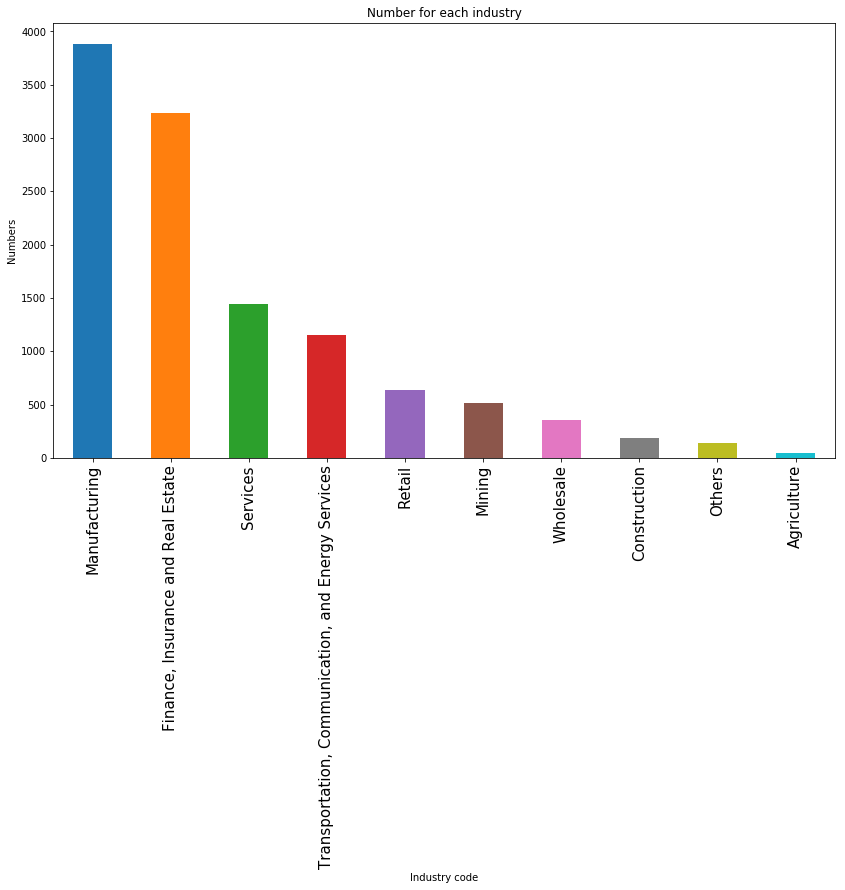

In [48]:
##Plotting industry distribution
ax = finalized_kmv_data_RiskFactor_industry['industry'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each industry")
ax.set_xlabel("Industry code")
ax.set_ylabel("Numbers")
plt.xticks(fontsize = 15)
plt.show()

In [49]:
#merge industry, edf, and year with topic mixture with lable 
topic_mixture_with_label_industry = pd.concat([topic_mixture_with_label, 
                                               finalized_kmv_data_RiskFactor_industry['industry']],
                                              axis = 1)

In [50]:
topic_mixture_with_label_industry_edf = pd.concat([topic_mixture_with_label_industry,
                                                   kmv_data_RiskFactor_industry_dropna['edf_x']],
                                                  axis=1)

In [51]:
topic_mixture_with_label_industry_edf_year = pd.concat([topic_mixture_with_label_industry_edf,
                                                   kmv_data_RiskFactor_industry_dropna['year']],
                                                  axis=1)

In [52]:
topic_mixture_with_label_industry_edf_year_key = pd.concat([topic_mixture_with_label_industry_edf_year,
                                                   kmv_data_RiskFactor_industry_dropna['gvkey']],
                                                  axis=1)

In [53]:
topic_mixture_with_label_industry_edf_year_key.head()

,Downstream_Risks,Insurance_Risks,Company_Operation_Risks,New_Product_Introduction_Risks,International_Operation_Risks,Suppliers_Risks,Product_Design_Risks,Commodity_Price_Risks,Healthcare_Spending_Risks,Shareholder_Interest_Risks,Input_Prices_Risks,Regulation_Changes_risks,Infrastructure_Operation_Disruption Risks,Medical_Regulation_Risks,Investment_Risks,industry,edf_x,year,gvkey
0,0.0,0.0,0.000000,0.0,0.077445,0.100568,0.0,0.035261,0.0,0.000000,0.0,0.560545,0.221024,0.0,0.0,Manufacturing,4.688468e-01,2012,1004
1,0.0,0.0,0.000000,0.0,0.077215,0.056698,0.0,0.063246,0.0,0.000000,0.0,0.598037,0.198050,0.0,0.0,Manufacturing,2.498562e-02,2013,1004
2,0.0,0.0,0.020661,0.0,0.075671,0.017670,0.0,0.045754,0.0,0.000000,0.0,0.623851,0.209510,0.0,0.0,Manufacturing,6.887845e-04,2014,1004
3,0.0,0.0,0.000000,0.0,0.081197,0.022783,0.0,0.020453,0.0,0.000000,0.0,0.675081,0.200066,0.0,0.0,Manufacturing,1.532112e-02,2015,1004
4,0.0,0.0,0.184320,0.0,0.000000,0.269203,0.0,0.062008,0.0,0.012008,0.0,0.451174,0.000000,0.0,0.0,Manufacturing,1.858681e-09,2012,1050


In [54]:
#save the dataset with industry info.
topic_mixture_with_label_industry_edf_year_key.to_csv('/Users/iriswang/Google Drive/Stevens/Fall 2018/BIA660/Project/code/output/topic_mixture_with_label_industry_edf_year_key.csv')

In [55]:
#duplicate columns of gvkey, year and edf (y)
topic_mixture_all = topic_mixture_with_label_industry_edf_year_key 

In [56]:
topic_mixture_all['edf_y'] = topic_mixture_all['edf_x']
topic_mixture_all['year_y'] = topic_mixture_all['year']
topic_mixture_all['gvkey_y'] = topic_mixture_all['gvkey']

In [57]:
topic_mixture_all.head()

,Downstream_Risks,Insurance_Risks,Company_Operation_Risks,New_Product_Introduction_Risks,International_Operation_Risks,Suppliers_Risks,Product_Design_Risks,Commodity_Price_Risks,Healthcare_Spending_Risks,Shareholder_Interest_Risks,...,Infrastructure_Operation_Disruption Risks,Medical_Regulation_Risks,Investment_Risks,industry,edf_x,year,gvkey,edf_y,year_y,gvkey_y
0,0.0,0.0,0.000000,0.0,0.077445,0.100568,0.0,0.035261,0.0,0.000000,...,0.221024,0.0,0.0,Manufacturing,4.688468e-01,2012,1004,4.688468e-01,2012,1004
1,0.0,0.0,0.000000,0.0,0.077215,0.056698,0.0,0.063246,0.0,0.000000,...,0.198050,0.0,0.0,Manufacturing,2.498562e-02,2013,1004,2.498562e-02,2013,1004
2,0.0,0.0,0.020661,0.0,0.075671,0.017670,0.0,0.045754,0.0,0.000000,...,0.209510,0.0,0.0,Manufacturing,6.887845e-04,2014,1004,6.887845e-04,2014,1004
3,0.0,0.0,0.000000,0.0,0.081197,0.022783,0.0,0.020453,0.0,0.000000,...,0.200066,0.0,0.0,Manufacturing,1.532112e-02,2015,1004,1.532112e-02,2015,1004
4,0.0,0.0,0.184320,0.0,0.000000,0.269203,0.0,0.062008,0.0,0.012008,...,0.000000,0.0,0.0,Manufacturing,1.858681e-09,2012,1050,1.858681e-09,2012,1050


In [58]:
len(topic_mixture_all.gvkey.unique())

2392

In [59]:
#get data with year from 2012 - 2016
# Remove companies which have fewer than five years reports
gvkey_count = topic_mixture_all.groupby(['gvkey']).count()
gvkey_count.sample(5)

,Downstream_Risks,Insurance_Risks,Company_Operation_Risks,New_Product_Introduction_Risks,International_Operation_Risks,Suppliers_Risks,Product_Design_Risks,Commodity_Price_Risks,Healthcare_Spending_Risks,Shareholder_Interest_Risks,...,Regulation_Changes_risks,Infrastructure_Operation_Disruption Risks,Medical_Regulation_Risks,Investment_Risks,industry,edf_x,year,edf_y,year_y,gvkey_y
gvkey,,,,,,,,,,,,,,,,,,,,,
6461,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
254399,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
124036,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
27965,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
24755,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [60]:
# Leave gvkey with five years - len() = 2176 companies
gvkeys_left = set(gvkey_count[gvkey_count.year == 5].index.tolist())
len(gvkeys_left)

2176

In [61]:
# Match gvkey_count back to topic_mixture_all to get the final dataset
topic_mixture_all_5 = topic_mixture_all[topic_mixture_all['gvkey'].isin(gvkeys_left)]

In [62]:
topic_mixture_all_5.shape
#total observation - 10880 with 2176 unique gvkey - each company has five years data

(10880, 22)

In [63]:
topic_mixture_all_5 = topic_mixture_all_5.reset_index(drop=True)
topic_mixture_all_5.head()

,Downstream_Risks,Insurance_Risks,Company_Operation_Risks,New_Product_Introduction_Risks,International_Operation_Risks,Suppliers_Risks,Product_Design_Risks,Commodity_Price_Risks,Healthcare_Spending_Risks,Shareholder_Interest_Risks,...,Infrastructure_Operation_Disruption Risks,Medical_Regulation_Risks,Investment_Risks,industry,edf_x,year,gvkey,edf_y,year_y,gvkey_y
0,0.0,0.0,0.184320,0.0,0.0,0.269203,0.0,0.062008,0.0,0.012008,...,0.0,0.0,0.0,Manufacturing,1.858681e-09,2012,1050,1.858681e-09,2012,1050
1,0.0,0.0,0.205209,0.0,0.0,0.274505,0.0,0.062746,0.0,0.010216,...,0.0,0.0,0.0,Manufacturing,1.952039e-05,2013,1050,1.952039e-05,2013,1050
2,0.0,0.0,0.177089,0.0,0.0,0.283996,0.0,0.059909,0.0,0.000000,...,0.0,0.0,0.0,Manufacturing,2.633908e-05,2014,1050,2.633908e-05,2014,1050
3,0.0,0.0,0.184813,0.0,0.0,0.250557,0.0,0.060789,0.0,0.000000,...,0.0,0.0,0.0,Manufacturing,2.867500e-02,2015,1050,2.867500e-02,2015,1050
4,0.0,0.0,0.124984,0.0,0.0,0.223728,0.0,0.062554,0.0,0.000000,...,0.0,0.0,0.0,Manufacturing,3.790925e-02,2016,1050,3.790925e-02,2016,1050


In [64]:
#save the dataset with industry info.
topic_mixture_all_5.to_csv('/Users/iriswang/Google Drive/Stevens/Fall 2018/BIA660/Project/code/output/topic_mixture_all_5.csv')

### Create lag data

In [65]:
#lag data - gvkey, edf, and year as 2012 to 2013, 2013 to 2014, 2014 to 2015, don't use 2016
lag_data = topic_mixture_all_5[['gvkey_y', 'year_y', 'edf_y']] 
lag_data['year_y_lag'] = lag_data['year_y']-1
new_lag_data = lag_data[['gvkey_y', 'edf_y', 'year_y_lag']]
new_lag_data = new_lag_data.rename(columns = {'gvkey_y':'gvkey', 'year_y_lag':'year_y'})
new_lag_data.head()

/Users/iriswang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gvkey,edf_y,year_y
0,1050,1.858681e-09,2011
1,1050,1.952039e-05,2012
2,1050,2.633908e-05,2013
3,1050,2.867500e-02,2014
4,1050,3.790925e-02,2015


In [66]:
#merge lagged data into original data with lagged year and edf score of later year
topic_mixture_all_5_lag = pd.merge(topic_mixture_all_5, new_lag_data, 
                                  on = ['gvkey', 'year_y'], how='inner')

In [67]:
topic_mixture_all_5_lag = topic_mixture_all_5_lag.drop(['edf_y_x', 'gvkey_y'], axis=1)

In [68]:
topic_mixture_all_5_lag = topic_mixture_all_5_lag.rename(columns = {'year':'year_x',
                                                                    'edf_y_y':'edf_y'})

In [69]:
#change back the actural year_y
topic_mixture_all_5_lag['year_y'] = topic_mixture_all_5_lag['year_y'] + 1
topic_mixture_all_5_lag.tail(10)

,Downstream_Risks,Insurance_Risks,Company_Operation_Risks,New_Product_Introduction_Risks,International_Operation_Risks,Suppliers_Risks,Product_Design_Risks,Commodity_Price_Risks,Healthcare_Spending_Risks,Shareholder_Interest_Risks,...,Regulation_Changes_risks,Infrastructure_Operation_Disruption Risks,Medical_Regulation_Risks,Investment_Risks,industry,edf_x,year_x,gvkey,year_y,edf_y
8694,0.0,0.000000,0.0,0.0,0.000000,0.010423,0.046828,0.000000,0.039466,0.000000,...,0.511175,0.0,0.383525,0.0,Manufacturing,1.053027e-09,2014,271794,2015,0.015793
8695,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.048577,0.000000,0.043196,0.000000,...,0.510844,0.0,0.385612,0.0,Manufacturing,1.579269e-02,2015,271794,2016,0.512138
8696,0.0,0.408711,0.0,0.0,0.046502,0.000000,0.000000,0.544721,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,Mining,8.171009e-03,2012,282189,2013,0.042898
8697,0.0,0.433182,0.0,0.0,0.036777,0.000000,0.000000,0.529035,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,Mining,4.289827e-02,2013,282189,2014,0.559831
8698,0.0,0.421676,0.0,0.0,0.032092,0.000000,0.000000,0.546175,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,Mining,5.598307e-01,2014,282189,2015,0.993544
8699,0.0,0.430591,0.0,0.0,0.024362,0.000000,0.000000,0.544997,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,Mining,9.935444e-01,2015,282189,2016,0.997237
8700,0.0,0.000000,0.0,0.0,0.000000,0.067717,0.000000,0.054895,0.000000,0.090573,...,0.786505,0.0,0.000000,0.0,Manufacturing,4.680753e-01,2012,282553,2013,0.540406
8701,0.0,0.000000,0.0,0.0,0.000000,0.064383,0.000000,0.049977,0.000000,0.139520,...,0.745826,0.0,0.000000,0.0,Manufacturing,5.404055e-01,2013,282553,2014,0.248580
8702,0.0,0.000000,0.0,0.0,0.000000,0.101766,0.000000,0.031598,0.000000,0.089093,...,0.767382,0.0,0.000000,0.0,Manufacturing,2.485801e-01,2014,282553,2015,0.195455
8703,0.0,0.000000,0.0,0.0,0.000000,0.121785,0.000000,0.023402,0.000000,0.049582,...,0.784288,0.0,0.019971,0.0,Manufacturing,1.954546e-01,2015,282553,2016,0.547164


In [70]:
topic_mixture_all_5_lag.shape

(8704, 21)

In [71]:
#save the dataset for prediction
topic_mixture_all_5_lag.to_csv('/Users/iriswang/Google Drive/Stevens/Fall 2018/BIA660/Project/code/output/topic_mixture_all_5_lag.csv')

### Prediction model
- Linear regression
- Random forest regression
- Logistic regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing,svm
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection,metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

/Users/iriswang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [73]:
#create dummy variable for industry columns
dummies = pd.get_dummies(topic_mixture_all_5_lag['industry'])
dummies.head()

,Agriculture,Construction,"Finance, Insurance and Real Estate",Manufacturing,Mining,Others,Retail,Services,"Transportation, Communication, and Energy Services",Wholesale
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0


In [74]:
#join dummies back to data
topic_mixture_all_5_lag_dummy = pd.concat([topic_mixture_all_5_lag, dummies], axis=1)
topic_mixture_all_5_lag_dummy.head()

,Downstream_Risks,Insurance_Risks,Company_Operation_Risks,New_Product_Introduction_Risks,International_Operation_Risks,Suppliers_Risks,Product_Design_Risks,Commodity_Price_Risks,Healthcare_Spending_Risks,Shareholder_Interest_Risks,...,Agriculture,Construction,"Finance, Insurance and Real Estate",Manufacturing,Mining,Others,Retail,Services,"Transportation, Communication, and Energy Services",Wholesale
0,0.0,0.0,0.184320,0.0,0.0,0.269203,0.0,0.062008,0.0,0.012008,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0.0,0.205209,0.0,0.0,0.274505,0.0,0.062746,0.0,0.010216,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.0,0.177089,0.0,0.0,0.283996,0.0,0.059909,0.0,0.000000,...,0,0,0,1,0,0,0,0,0,0
3,0.0,0.0,0.184813,0.0,0.0,0.250557,0.0,0.060789,0.0,0.000000,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,0.707182,0.0,0.0,0.000000,0.0,0.000000,0.0,0.132678,...,0,0,0,0,0,0,0,0,1,0


In [75]:
topic_mixture_all_5_lag_dummy.shape

(8704, 31)

In [76]:
#save the dataset for prediction
topic_mixture_all_5_lag_dummy.to_csv('/Users/iriswang/Google Drive/Stevens/Fall 2018/BIA660/Project/code/output/topic_mixture_all_5_lag_dummy.csv')

In [548]:
#correlation between industry variables and edf
correlation_data = topic_mixture_all_5_lag_dummy[['Agriculture', 'Construction', 'Finance, Insurance and Real Estate',
                                                 'Manufacturing', 'Mining', 'Others', 'Retail', 'Services', 
                                                  'Transportation, Communication, and Energy Services', 'Wholesale', 
                                                  'edf_x', 'year_x',
                                                 'edf_y', 'year_y']]

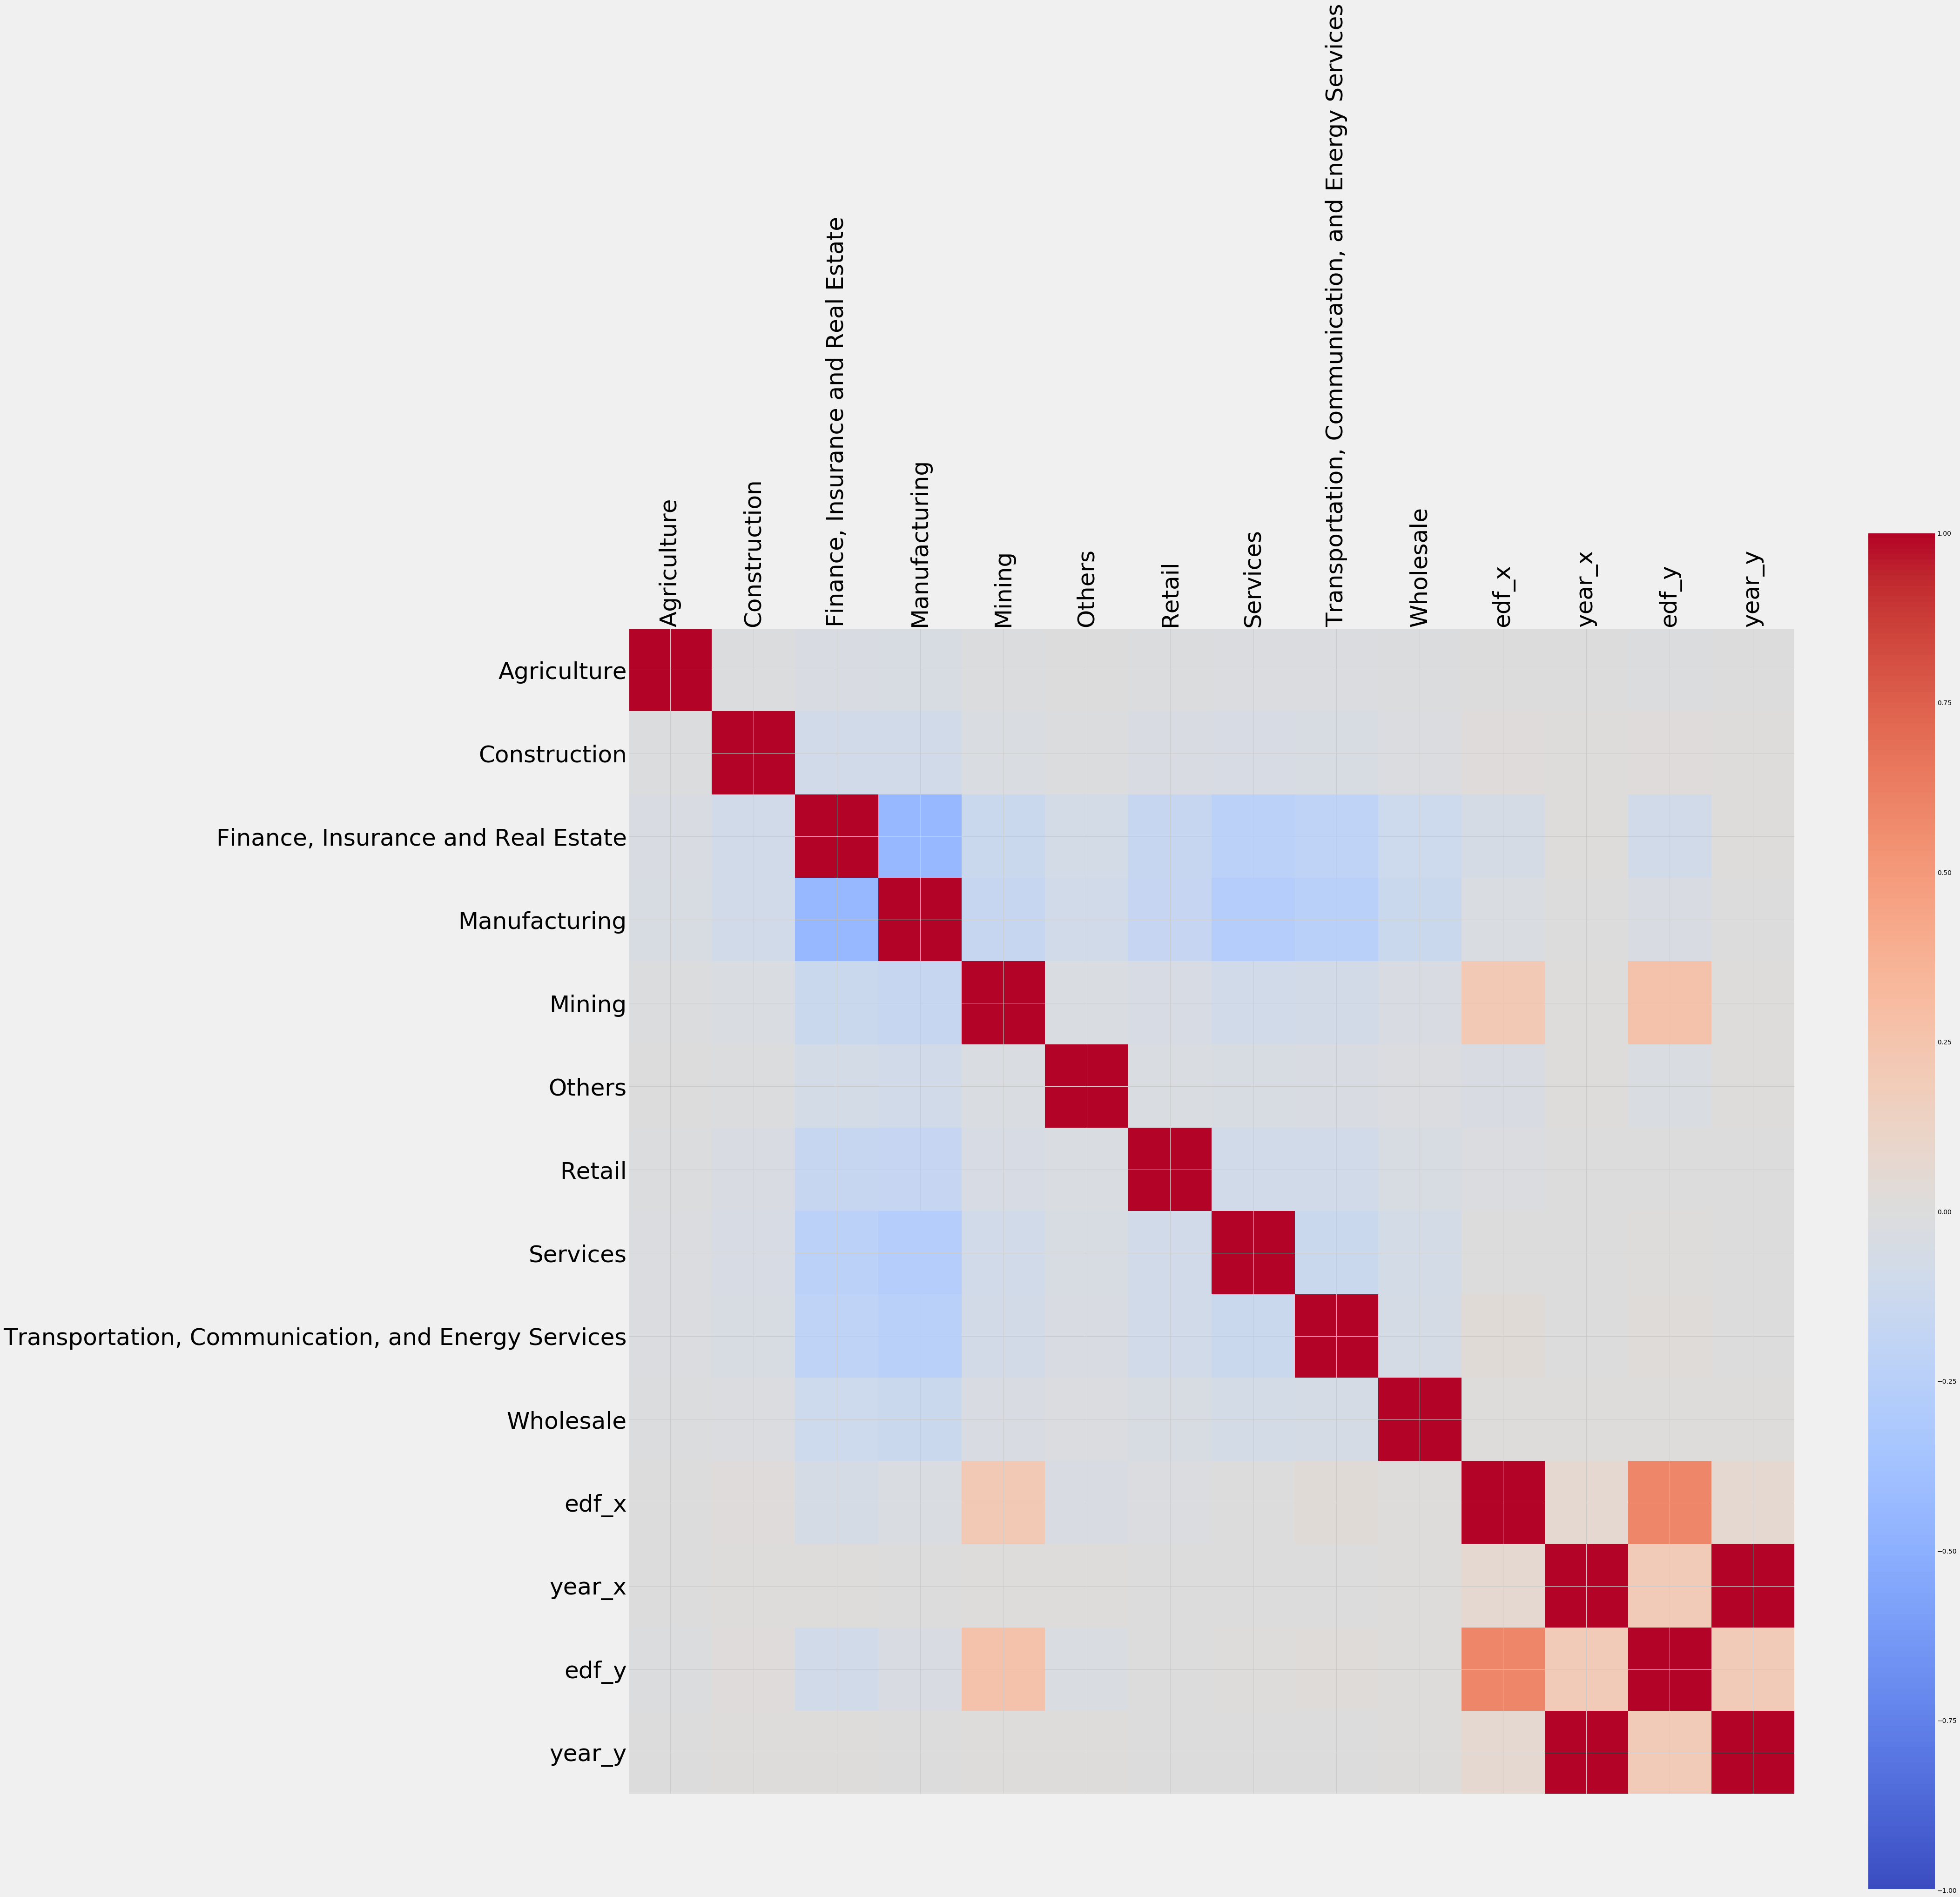

In [553]:
corr = correlation_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlation_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90, fontsize=50)
ax.set_yticks(ticks)
plt.yticks(fontsize=50)
ax.set_xticklabels(correlation_data.columns)
ax.set_yticklabels(correlation_data.columns)
plt.show()

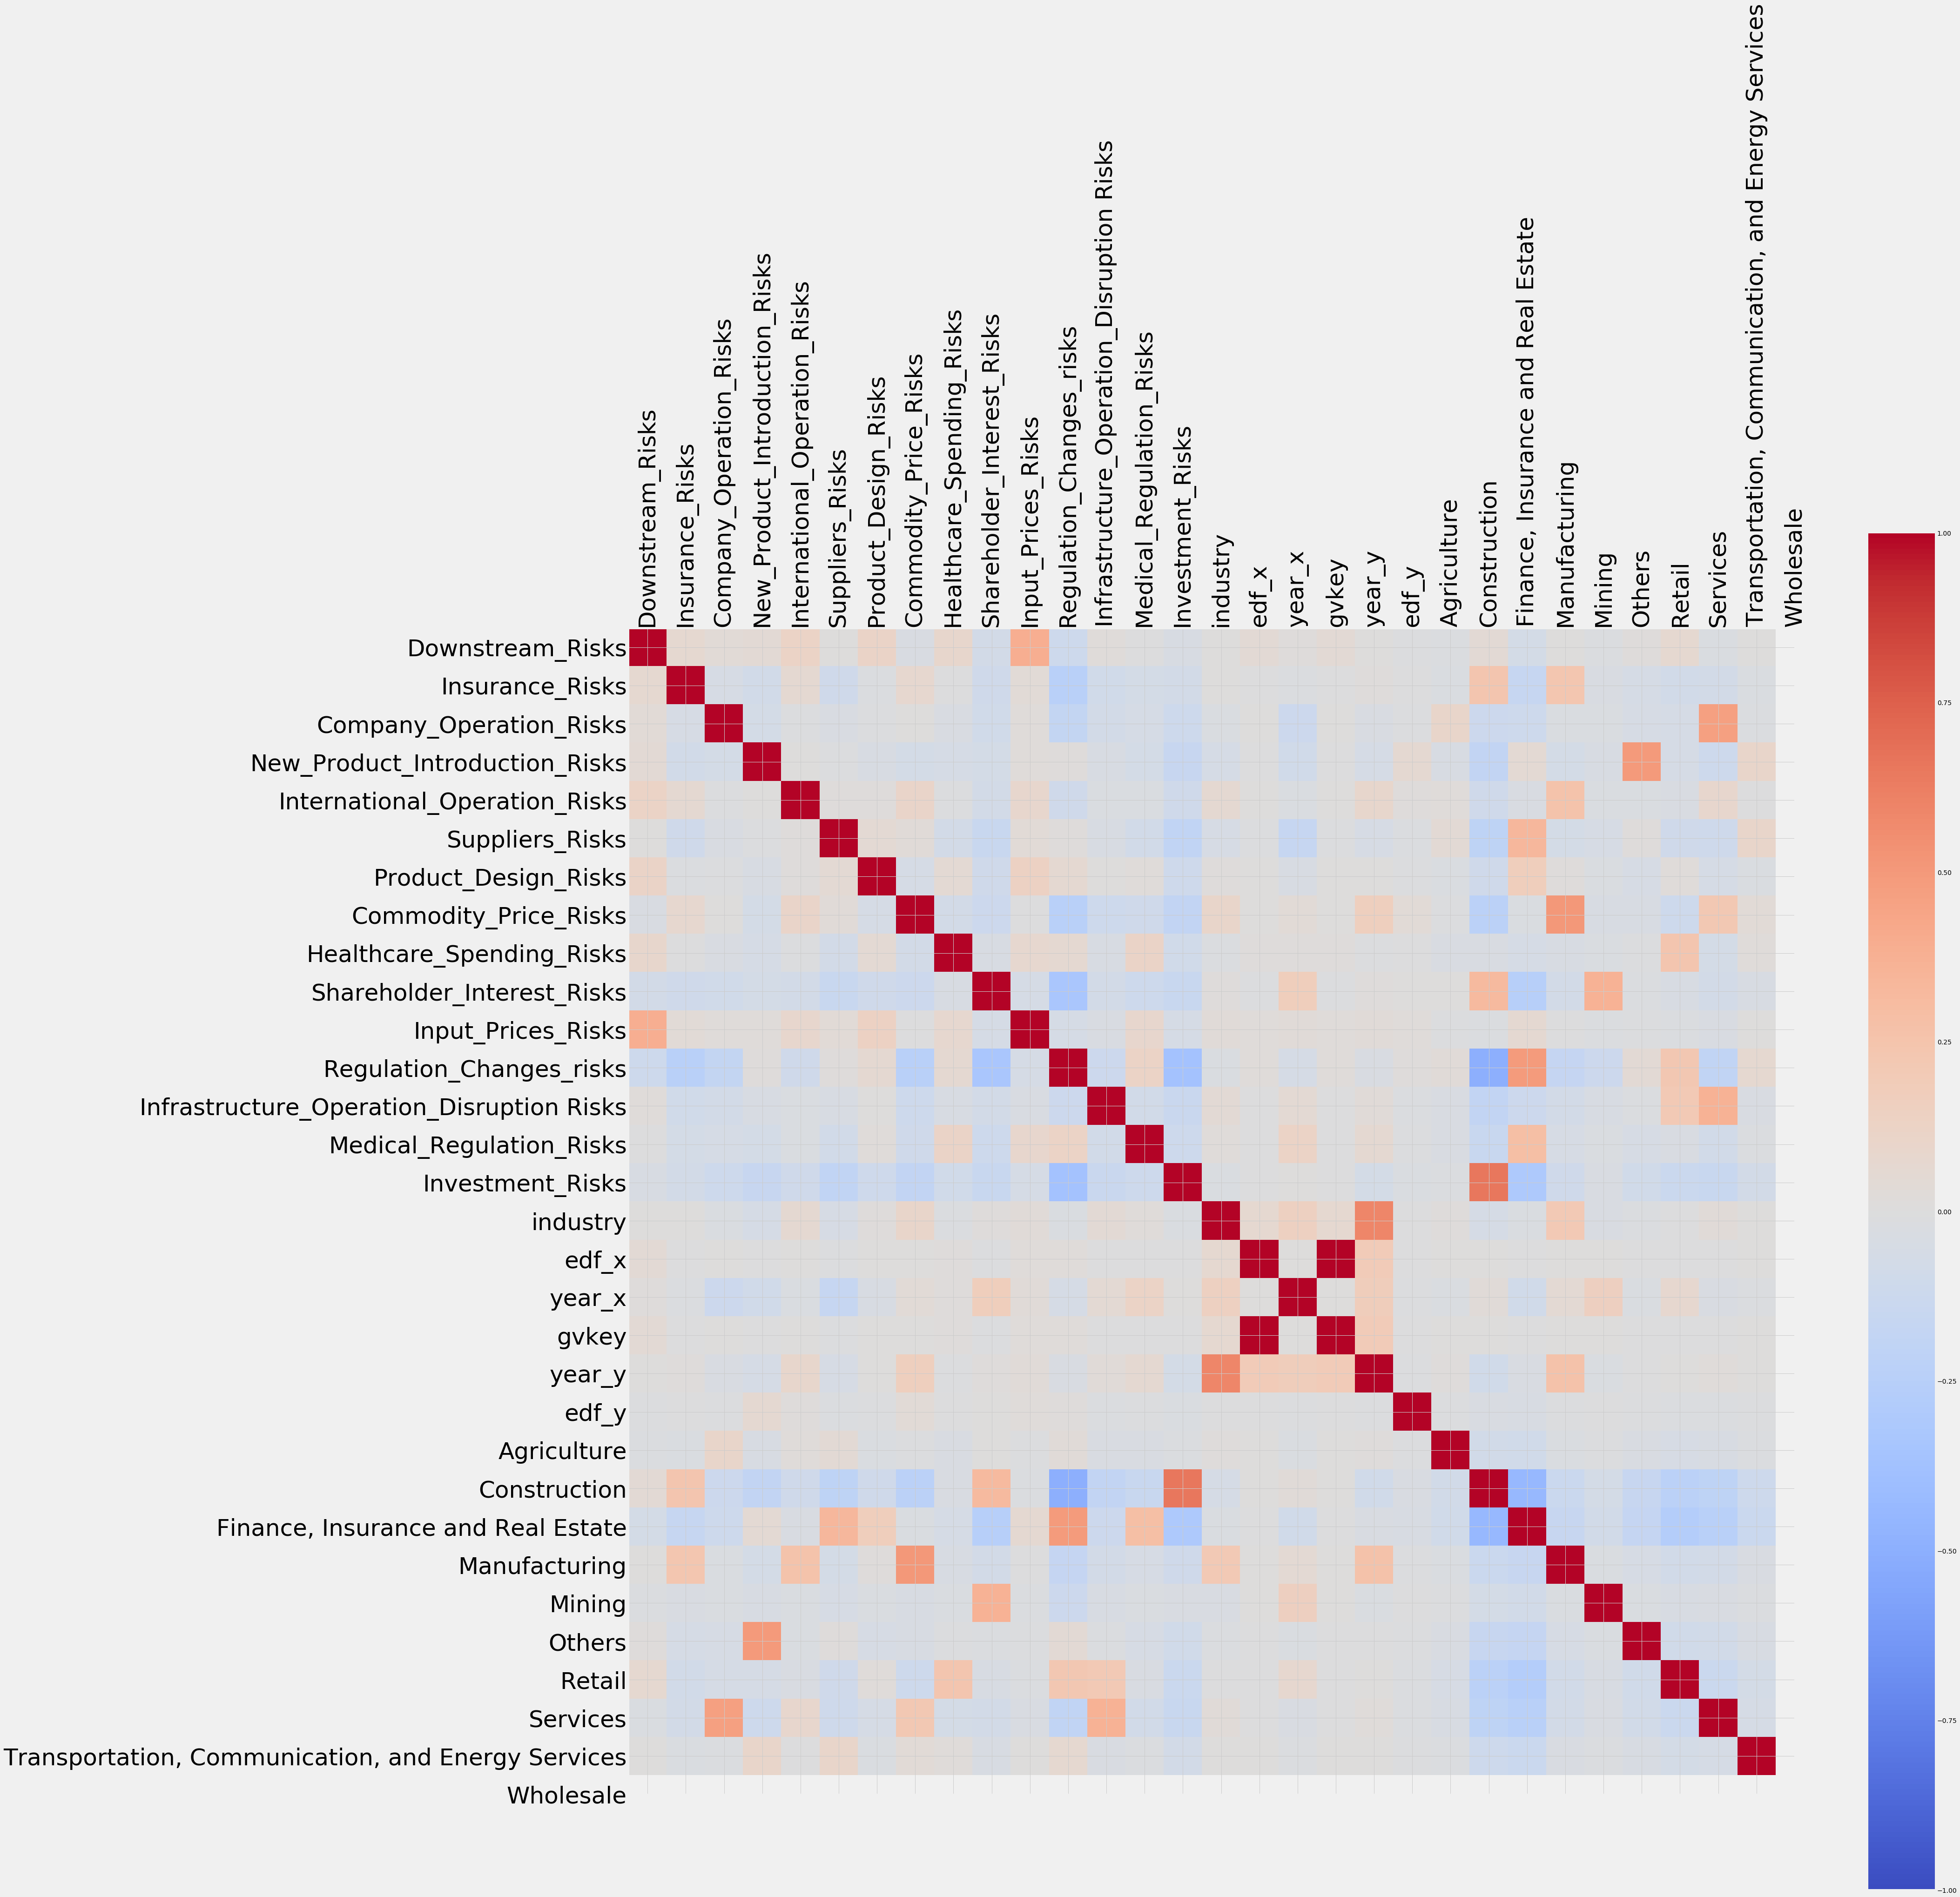

In [554]:
corr_2 = topic_mixture_all_5_lag_dummy.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_2,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(topic_mixture_all_5_lag_dummy.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90, fontsize=50)
ax.set_yticks(ticks)
plt.yticks(fontsize=50)
ax.set_xticklabels(topic_mixture_all_5_lag_dummy.columns)
ax.set_yticklabels(topic_mixture_all_5_lag_dummy.columns)
plt.show()

#### Multiple Regression

In [385]:
x = topic_mixture_all_5_lag_dummy.drop(['edf_x', 'year_x', 'gvkey', 'year_y', 'edf_y', 'industry'], axis=1)
y = topic_mixture_all_5_lag_dummy['edf_y']

In [386]:
#To check the accuracy/confidence level of the prediction, 25% test datasets, while 75% is used for training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6528, 25) (6528,)
(2176, 25) (2176,)


In [299]:
lm = LinearRegression(n_jobs=-1)

In [387]:
#fit a model
model=lm.fit(X_train,y_train)
#print the coefficents
print('The linear cofficients',model.coef_)

The linear cofficients [ 2.98381326e-01  2.69073625e-01  2.20051377e-01  1.60577657e-01
  3.53263036e-01  2.23735404e-01  3.09883404e-01  3.03390371e-01
  2.04200316e-01  3.48772662e-01  6.91220779e-01  2.54841504e-01
  3.19802741e-01  4.13753779e-01  3.01733014e-01 -9.41856510e+11
 -9.41856510e+11 -9.41856510e+11 -9.41856510e+11 -9.41856510e+11
 -9.41856510e+11 -9.41856510e+11 -9.41856510e+11 -9.41856510e+11
 -9.41856510e+11]


In [558]:
coef_df = pd.DataFrame({'coef': model.coef_,
                        'varname':X_train.columns})

In [559]:
coef_df

,coef,varname
0,2.983813e-01,Downstream_Risks
1,2.690736e-01,Insurance_Risks
2,2.200514e-01,Company_Operation_Risks
3,1.605777e-01,New_Product_Introduction_Risks
4,3.532630e-01,International_Operation_Risks
5,2.237354e-01,Suppliers_Risks
6,3.098834e-01,Product_Design_Risks
7,3.033904e-01,Commodity_Price_Risks
8,2.042003e-01,Healthcare_Spending_Risks
9,3.487727e-01,Shareholder_Interest_Risks


/Users/iriswang/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0,'Variables')

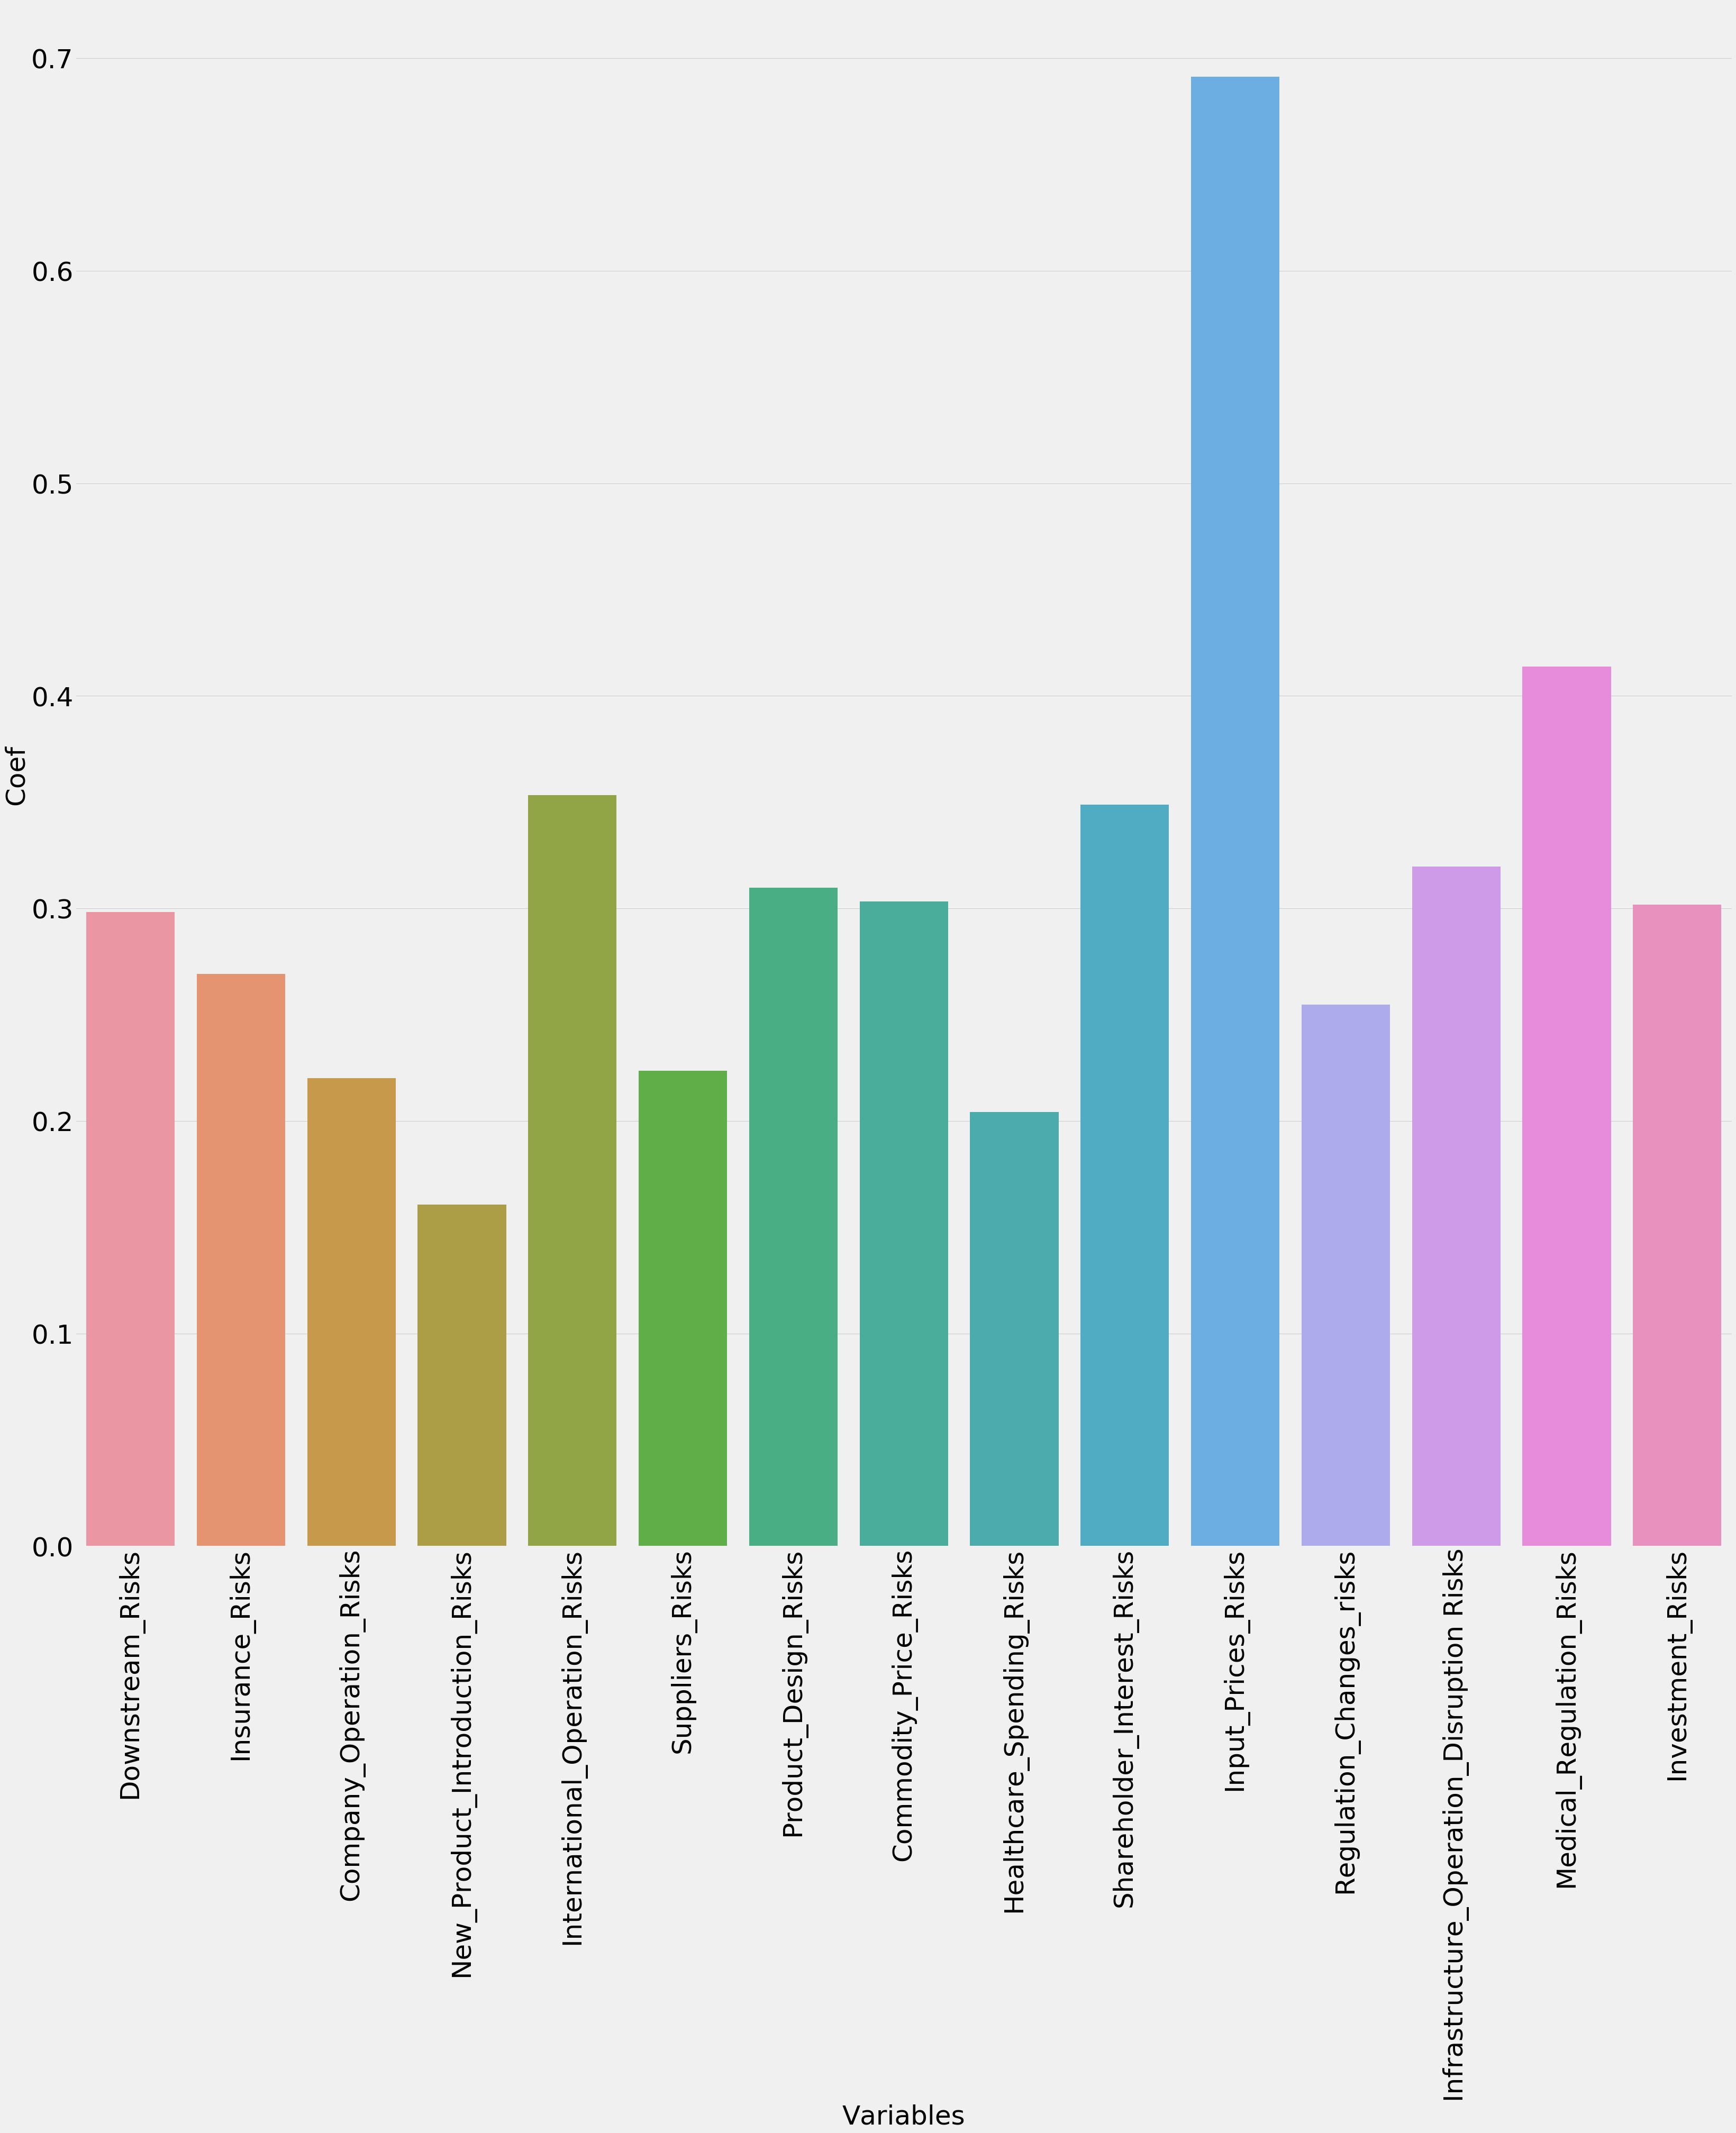

In [573]:
sns.barplot(x="varname", y="coef", data=coef_df[0:15])
plt.xticks(rotation=90, fontsize=50)
ax.set_yticks(ticks)
plt.yticks(fontsize=50)
plt.ylabel('Coef', fontsize=50)
plt.xlabel('Variables', fontsize=50)

In [388]:
#Try to predict the y ( edf_y) for the test data-features(independent variables(X_test)
predictions=lm.predict(X_test)

In [389]:
#Accuracy of the prediction
confidence = lm.score(X_test, y_test)
print('This is predicted edf Values',predictions)
print('This is the prediction accuracy',confidence)

This is predicted edf Values [0.05566406 0.06420898 0.11462402 ... 0.0904541  0.05737305 0.06738281]
This is the prediction accuracy 0.08852622405144951


In [399]:
y_true = y_test.tolist()

In [400]:
y_pred = predictions

In [401]:
#MAE
mean_absolute_error(y_true, y_pred)

0.11885484691901262

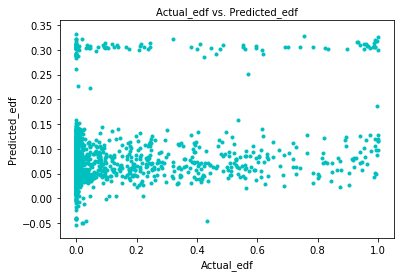

In [407]:
#plot Actual_edf vs. Predicted_edf
plt.legend(loc=4)
plt.title('Actual_edf vs. Predicted_edf', size=10)
plt.scatter(y_test,predictions,color='c', marker='.')
plt.xlabel('Actual_edf', size=10)
plt.ylabel('Predicted_edf', size=10)
plt.show()

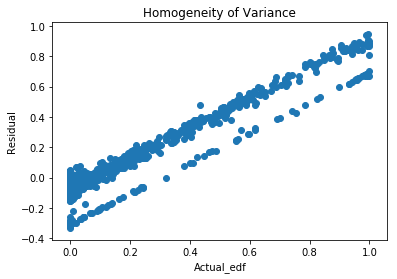

In [409]:
#plot y_test,residual
plt.legend(loc=4)
plt.title('Homogeneity of Variance')
plt.scatter(y_test,y_test-predictions)
plt.xlabel('Actual_edf')
plt.ylabel('Residual')
plt.show()

In [412]:
#Perform 5 fold Cross Validation (KFold)
scores=cross_val_score(model,x,y,cv=5)
print ('Cross Validated Scores',scores)

kf=KFold(n_splits=5, random_state=None,shuffle=True)

for train_index, test_index in kf.split(x):
    print ('TRAIN', train_index, 'TEST', test_index)

Cross Validated Scores [-0.07559878  0.05998016  0.00238053  0.04031712  0.03293041]
TRAIN [   0    1    2 ... 8701 8702 8703] TEST [  10   11   23 ... 8692 8698 8699]
TRAIN [   2    3    5 ... 8699 8700 8702] TEST [   0    1    4 ... 8697 8701 8703]
TRAIN [   0    1    3 ... 8700 8701 8703] TEST [   2    5    9 ... 8690 8693 8702]
TRAIN [   0    1    2 ... 8701 8702 8703] TEST [  14   15   16 ... 8691 8695 8700]
TRAIN [   0    1    2 ... 8701 8702 8703] TEST [   3   21   22 ... 8681 8694 8696]


In [416]:
#X_train,X_test=x[train_index], x[test_index]
#y_train,y_test=y[train_index], y[test_index]
# Make Cross Validated predictions
predictions2=cross_val_predict(model,x,y,cv=5)
#Check the R2- the proportion of variance in the dependent variable explained by the predictors
accuracy=metrics.r2_score(y,predictions2)
print ('This is R2',accuracy)

This is R2 0.055698536140334376


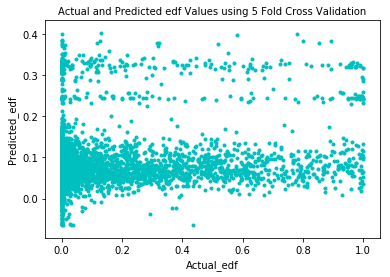

In [419]:
plt.scatter(y,predictions2,color='c', marker='.')
plt.legend(loc=4)
plt.xlabel('Actual_edf', size=10)
plt.ylabel('Predicted_edf', size=10)
plt.title('Actual and Predicted edf Values using 5 Fold Cross Validation',size=10)
plt.show()

#### SVR

In [422]:
svr=SVR(kernel='linear',degree=1)

In [423]:
#fit a model
model_2 = svr.fit(X_train,y_train)

In [425]:
predictions_2=svr.predict(X_test)
print(svr.score(X_test,y_test))
print(r2_score(y_test,predictions_2))

0.029490221253861134
0.029490221253861137


In [428]:
y_pred_2 = predictions_2

In [429]:
#MAE
mean_absolute_error(y_true, y_pred_2)

0.14308510881565928

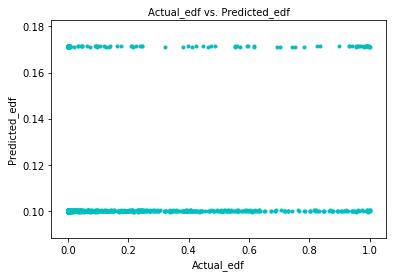

In [430]:
#plot Actual_edf vs. Predicted_edf
plt.legend(loc=4)
plt.title('Actual_edf vs. Predicted_edf', size=10)
plt.scatter(y_test,predictions_2,color='c', marker='.')
plt.xlabel('Actual_edf', size=10)
plt.ylabel('Predicted_edf', size=10)
plt.show()

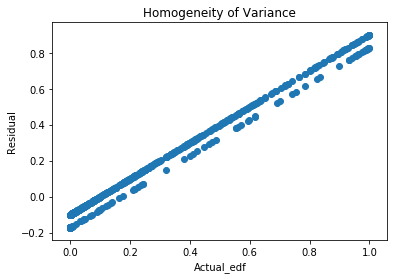

In [431]:
#plot y_test,residual
plt.legend(loc=4)
plt.title('Homogeneity of Variance')
plt.scatter(y_test,y_test-predictions_2)
plt.xlabel('Actual_edf')
plt.ylabel('Residual')
plt.show()

#### random forest regression

In [432]:
# Split the data into training and testing sets
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x, y, test_size = 0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6528, 25) (6528,)
(2176, 25) (2176,)


In [434]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [436]:
# Train the model on training data
model_3 = rf.fit(X_train_r, y_train_r)

In [437]:
# Use the forest's predict method on the test data
predictions_3 = rf.predict(X_test_r)

In [438]:
y_true_r = y_test_r.tolist()

In [439]:
y_pred_r = predictions_3

In [440]:
#MAE
mean_absolute_error(y_true_r, y_pred_r)

0.0941958726671664

In [444]:
from sklearn.tree import export_graphviz
import pydot

In [445]:
#Visualizing a Single Decision Tree
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [446]:
feature_list = list(x.columns)

In [447]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [448]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [449]:
# Write graph to a png file
graph.write_png('tree.png')

In [450]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train_r, y_train_r)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [451]:
# Extract the small tree
tree_small = rf_small.estimators_[5]

In [452]:
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [453]:
##Variable Importances
# Get numerical feature importances
importances = list(rf.feature_importances_)

In [454]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [455]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [457]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Shareholder_Interest_Risks Importance: 0.17
Variable: Regulation_Changes_risks Importance: 0.13
Variable: Investment_Risks     Importance: 0.11
Variable: Commodity_Price_Risks Importance: 0.09
Variable: Mining               Importance: 0.07
Variable: Insurance_Risks      Importance: 0.05
Variable: Suppliers_Risks      Importance: 0.05
Variable: Infrastructure_Operation_Disruption Risks Importance: 0.05
Variable: New_Product_Introduction_Risks Importance: 0.04
Variable: International_Operation_Risks Importance: 0.04
Variable: Medical_Regulation_Risks Importance: 0.04
Variable: Company_Operation_Risks Importance: 0.03
Variable: Product_Design_Risks Importance: 0.03
Variable: Healthcare_Spending_Risks Importance: 0.03
Variable: Downstream_Risks     Importance: 0.02
Variable: Input_Prices_Risks   Importance: 0.01
Variable: Retail               Importance: 0.01
Variable: Services             Importance: 0.01
Variable: Transportation, Communication, and Energy Services Importance: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [459]:
#plotting feature importances
# Set the style
plt.style.use('fivethirtyeight')

In [460]:
# list of x locations for plotting
x_values = list(range(len(importances)))

Text(0.5,1,'Variable Importances - Random Forest')

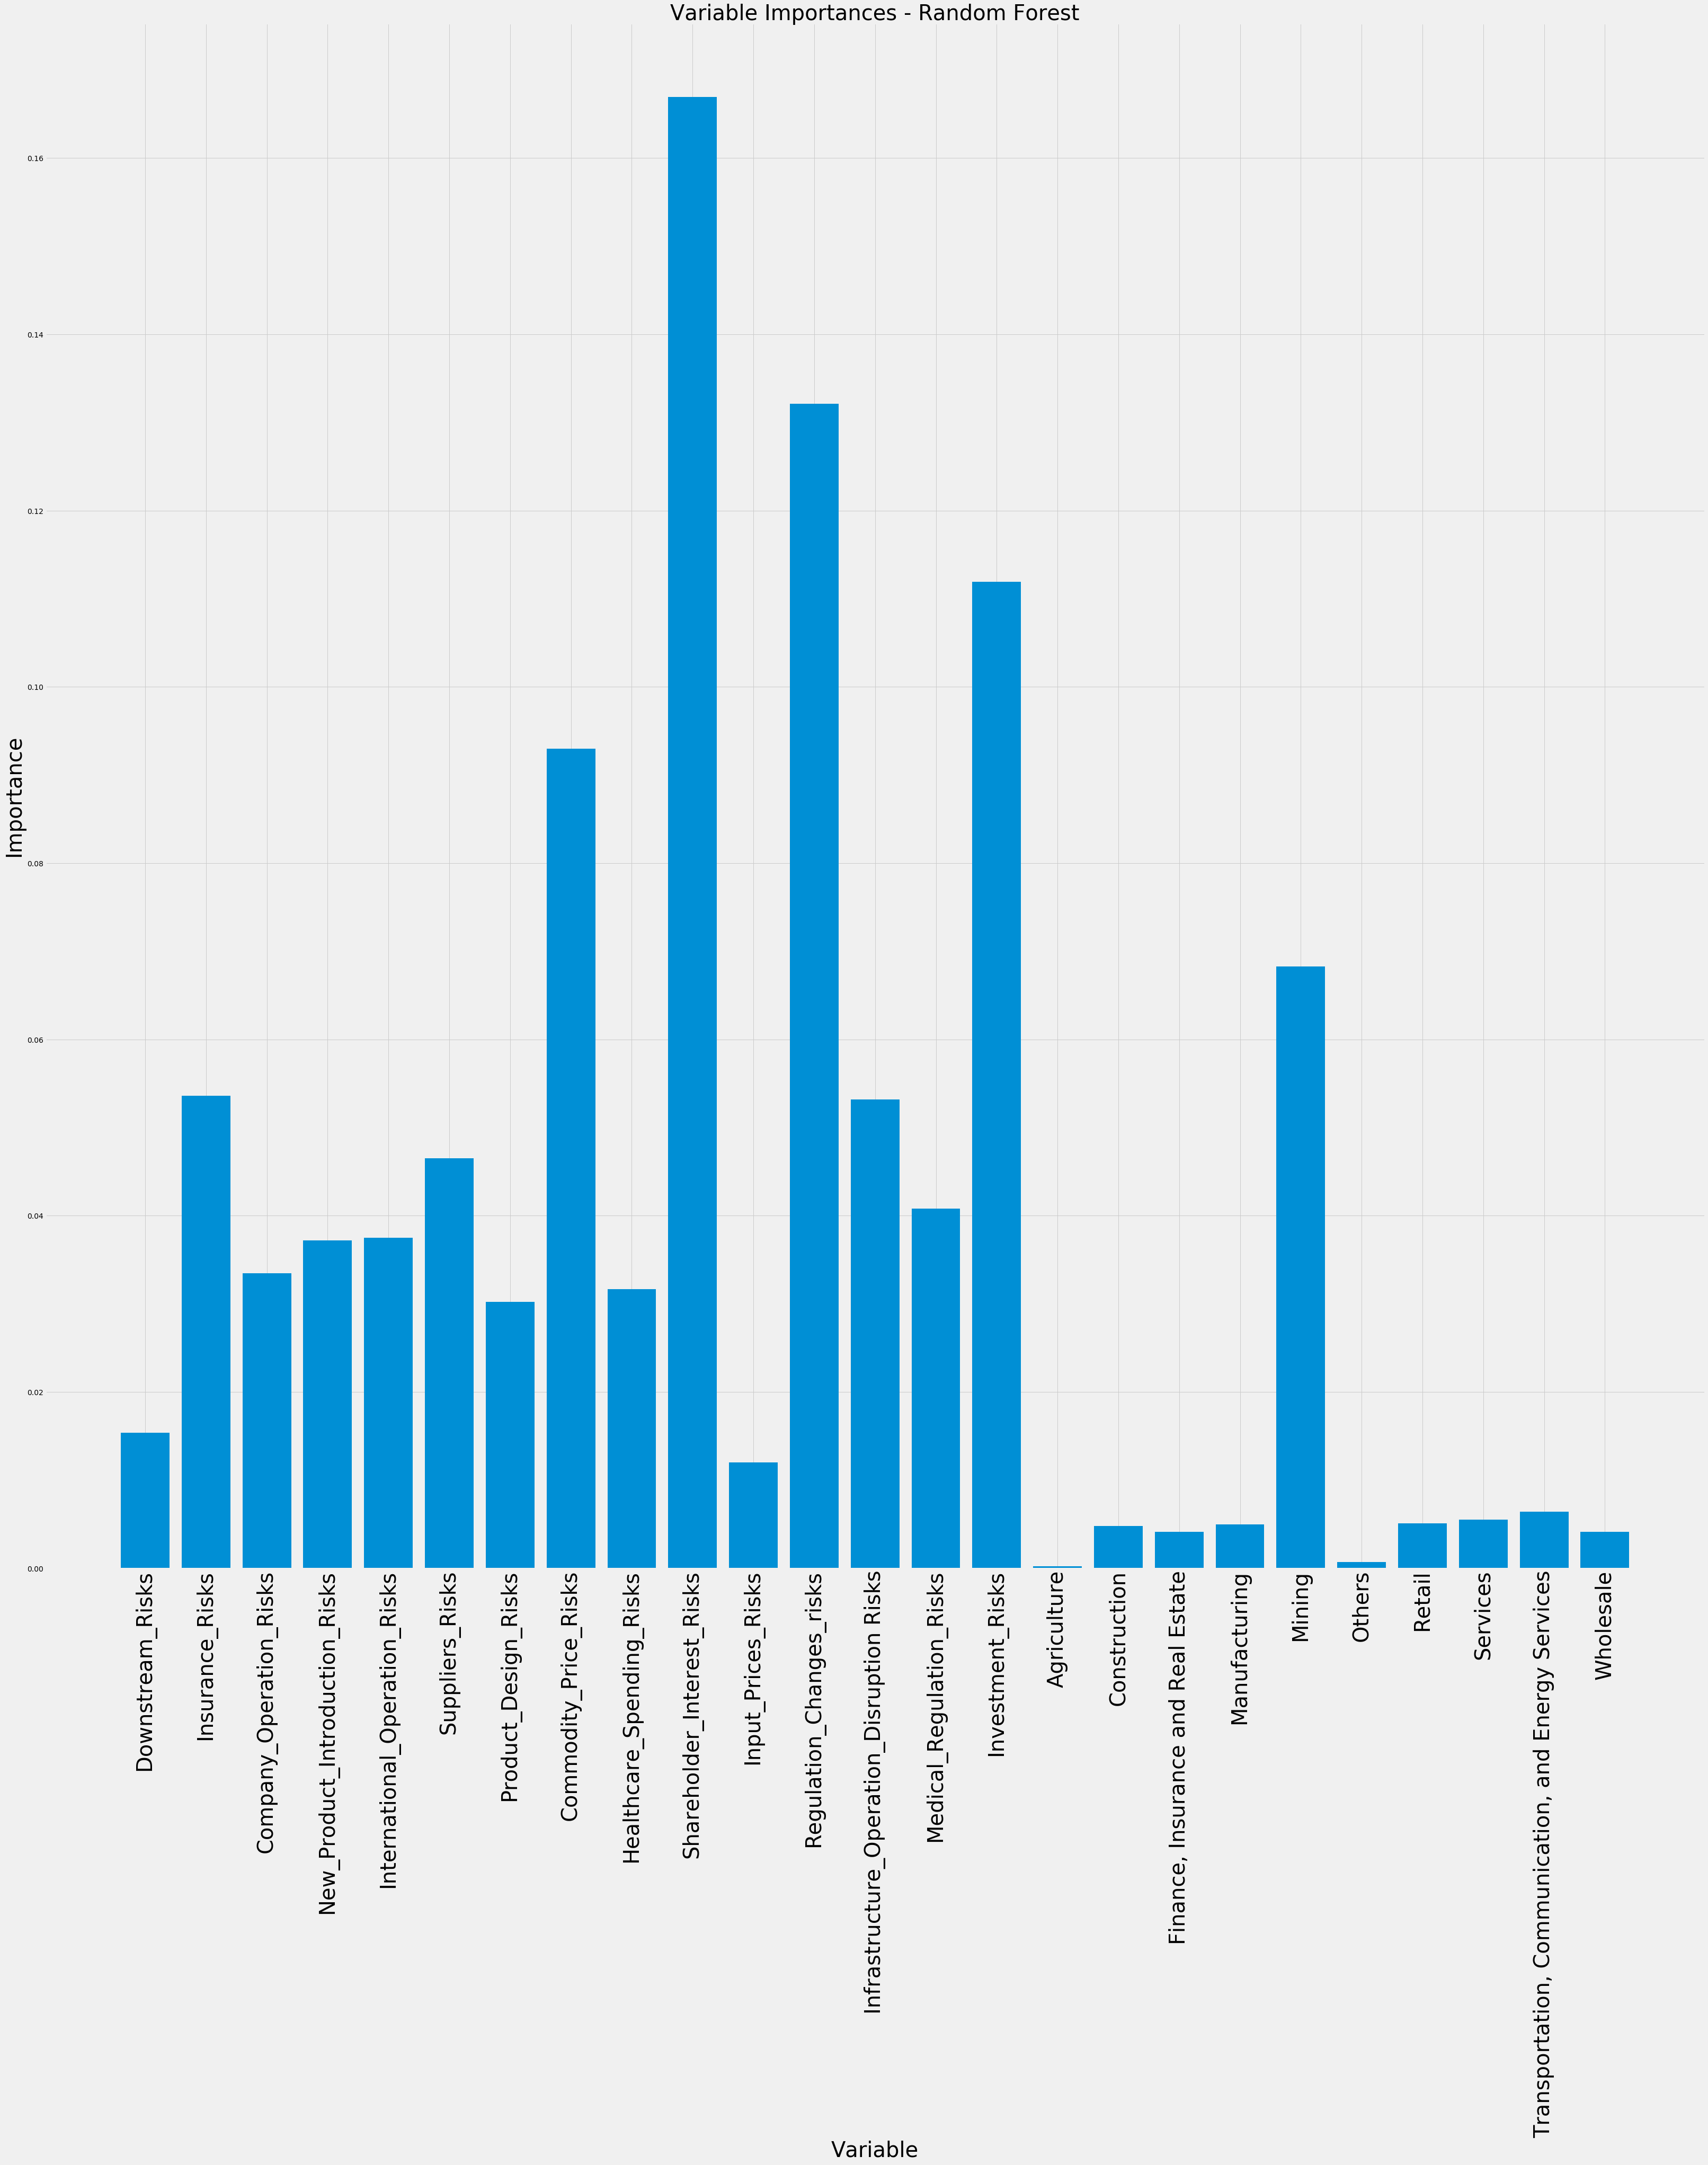

In [543]:
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical', fontsize=40)
# Axis labels and title
plt.ylabel('Importance', fontsize=40) 
plt.xlabel('Variable', fontsize=40) 
plt.title('Variable Importances - Random Forest', fontsize=40)

### Bayesian Linear Regression

In [465]:
clf = BayesianRidge(compute_score=True)

In [466]:
# Train the model on training data
model_clf = clf.fit(X_train,y_train)

In [467]:
#print the coefficents
print('The clf cofficients',model_clf.coef_)

The clf cofficients [ 0.02821005 -0.02049535 -0.06652715 -0.11541414  0.05509238 -0.06694583
  0.02074946  0.01855506 -0.0542821   0.05576581  0.0504896  -0.03306058
  0.03140475  0.1119725   0.01055159 -0.03753439  0.01805055 -0.06195882
 -0.01232049  0.19837959 -0.10211529  0.01611954 -0.01764498 -0.00577316
  0.00479746]


In [468]:
#Try to predict the y ( edf_y) for the test data-features(independent variables(X_test)
predictions_clf=clf.predict(X_test)

In [469]:
#Accuracy of the prediction
confidence_clf = clf.score(X_test, y_test)
print('This is predicted edf Values',predictions_clf)
print('This is the prediction accuracy',confidence_clf)

This is predicted edf Values [0.05585187 0.06351786 0.11185449 ... 0.08978371 0.05669541 0.07129336]
This is the prediction accuracy 0.08648686316725762


In [470]:
y_pred_clf = predictions_clf

In [471]:
#MAE
mean_absolute_error(y_true, y_pred_clf)

0.1188248910676202

### XGboost

In [474]:
#convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data = x, label = y)

In [475]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

In [476]:
#fit the model
model_xgb = xg_reg.fit(X_train,y_train)

In [477]:
#Predict the y
prediction_xgb = xg_reg.predict(X_test)

In [478]:
y_pred_xgb = prediction_xgb

In [479]:
#MAE
mean_absolute_error(y_true, y_pred_xgb)

0.22092557431313717

In [480]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("RMSE: %f" % (rmse))

RMSE: 0.244384


In [482]:
#3-fold Cross Validation using XGBoost
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[

[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[00:02:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_dept

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.427029,0.000301,0.427031,0.000457
1,0.393636,0.000507,0.393639,0.000532
2,0.363931,0.000495,0.363906,0.000968
3,0.337894,0.000576,0.337871,0.001380
4,0.315520,0.000762,0.315499,0.001625


In [483]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.184944
Name: test-rmse-mean, dtype: float64


In [503]:
#Visualize Boosting Trees and Feature Importance
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=20)

[00:08:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:08:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:08:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[00:08:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:08:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[00:08:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[00:08:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:08:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:08:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

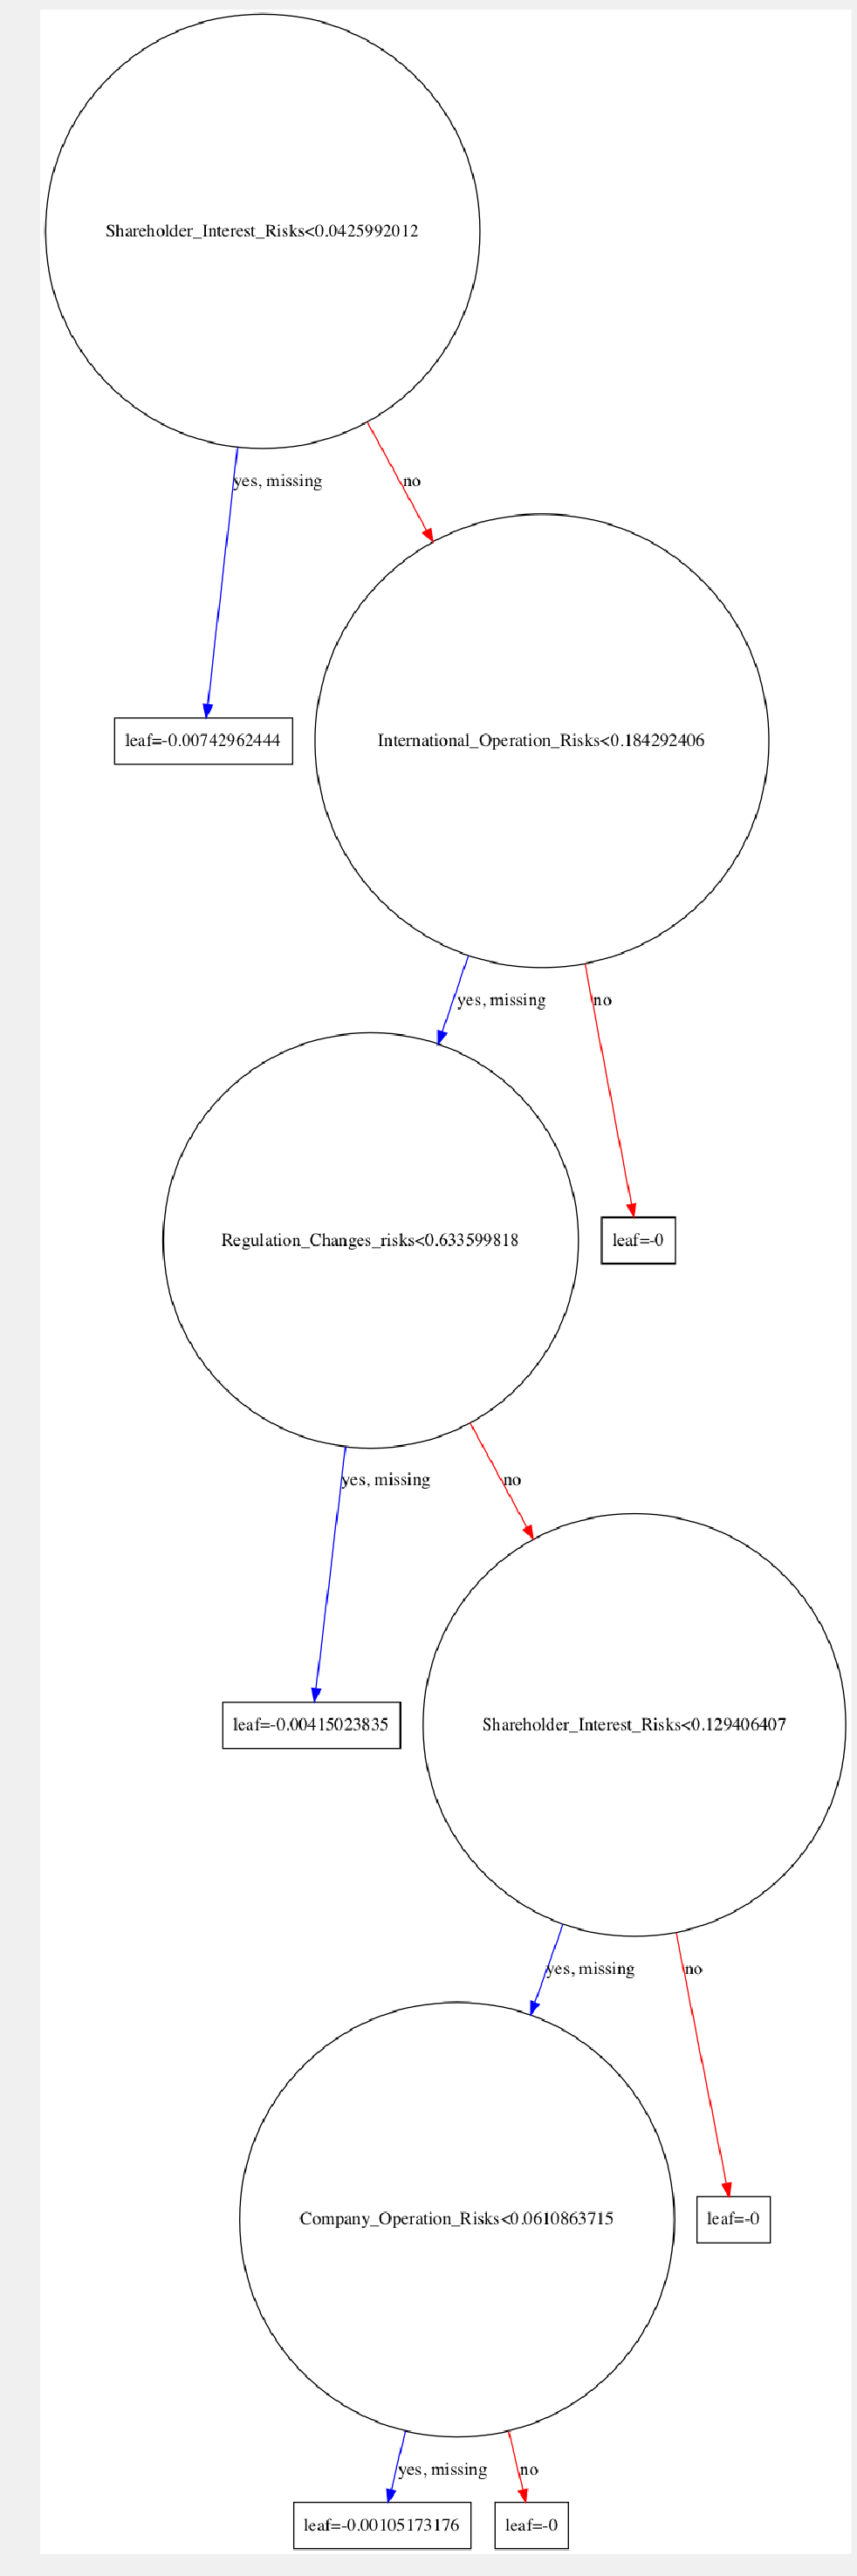

In [519]:
xgb.plot_tree(xg_reg,num_trees=19)
plt.rcParams['figure.figsize'] = [300, 50]
plt.show()

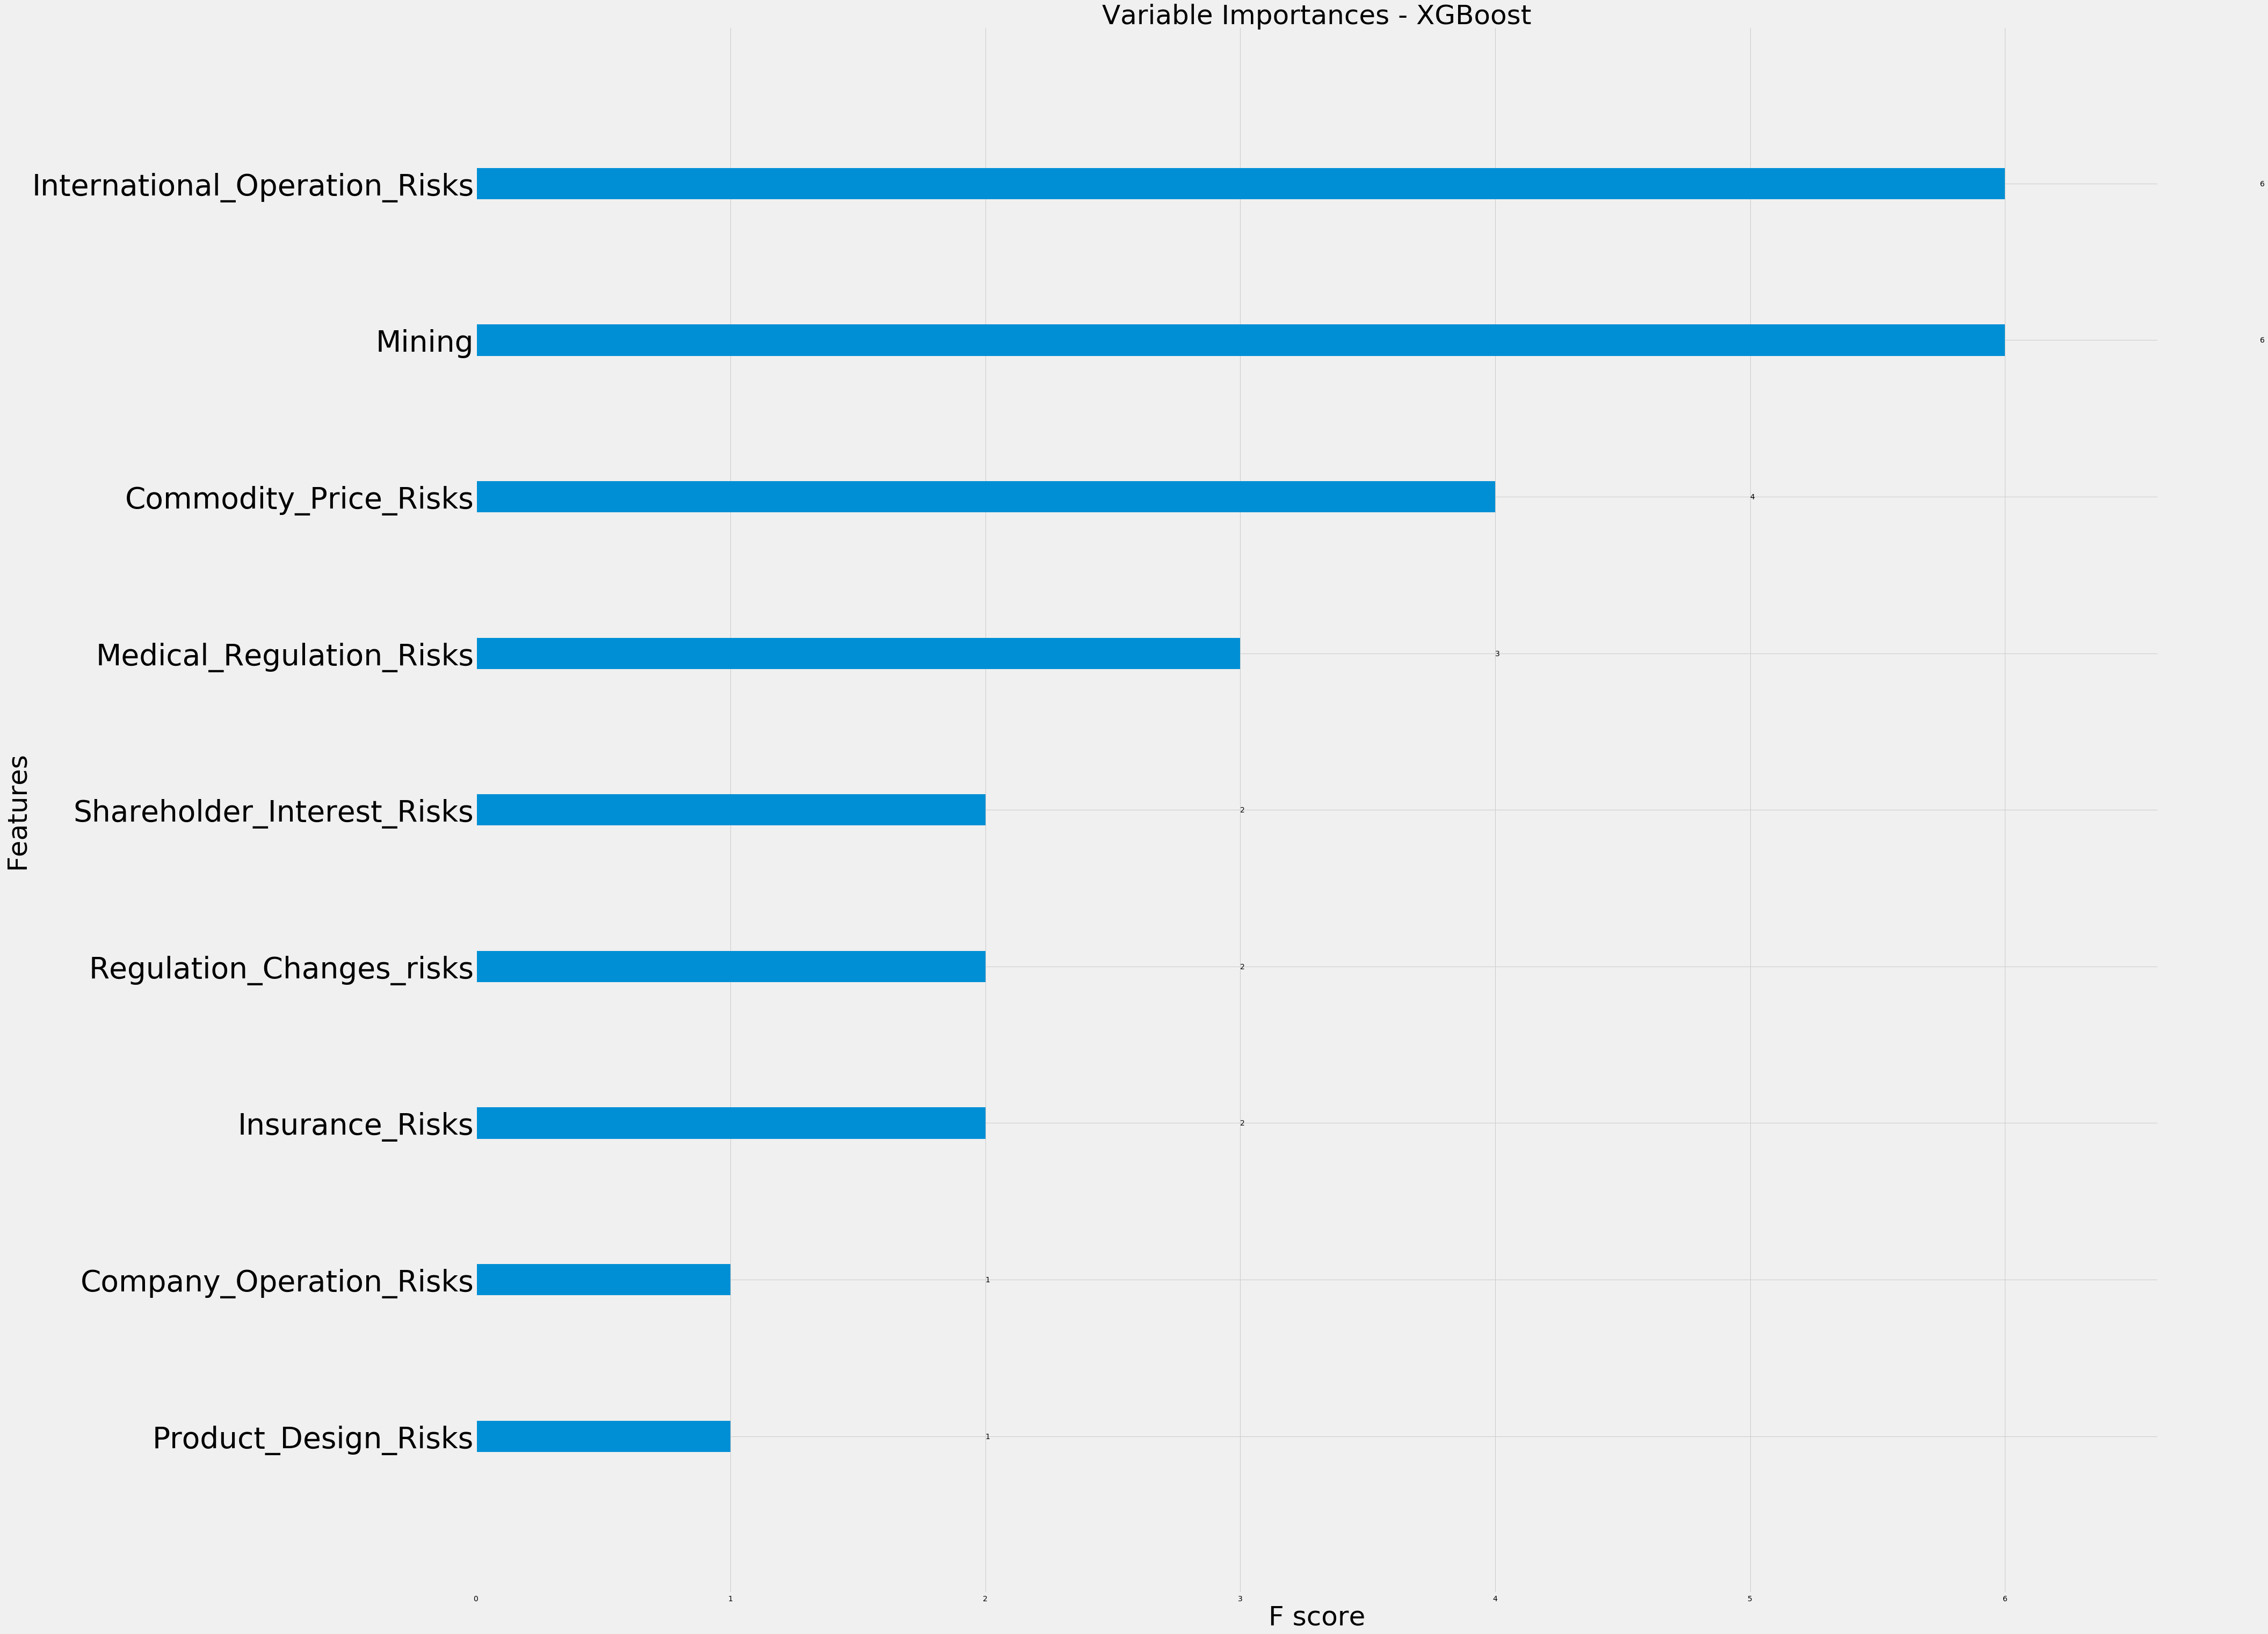

In [575]:
#feature importance
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 50]
plt.yticks(fontsize=55)
plt.xlabel('F score', fontsize=50)
plt.ylabel('Features', fontsize=50)
plt.title('Variable Importances - XGBoost', fontsize=50)
plt.show()